<h1 style="color:rgb(0,120,170)">Neural Networks and Deep Learning</h1>
<h2 style="color:rgb(0,120,170)">Machine Learning Introduction</h2>

#### The sinking of Titanic  
Based on [this](https://www.kaggle.com/c/titanic-gettingStarted) Kaggle Competition. Inspired by a handful of solutions, like [this one](https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8)

In [1]:
#!pip install -U forestci rgf_python scikit-learn joblib tpot imbalanced-learn tensorflow tensorboard xgboost lightgbm torch torchvision

In [2]:
import os
import sys
import time
import pickle
import itertools
import pandas as pd
import numpy as np
import pylab
import warnings

import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns

from IPython.display import display, Image
from IPython.core.interactiveshell import InteractiveShell

%matplotlib inline
#%matplotlib notebook
#matplotlib.rcdefaults()
#matplotlib.verbose.set_level('silent')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
## Optional -- testing GPU support to tensorflow
import tensorflow as tf
print(tf.__version__)
from tensorflow.python.client import device_lib

#sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))  ## output on console
print(device_lib.list_local_devices())

2.3.1
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2972937076807331022
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 10768106606961558430
physical_device_desc: "device: XLA_CPU device"
]


### The Mighty Titanic !

![Titanic](../../data/titanic.jpeg)

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.

#### Importing the datasets

In [4]:
datapath = ""
outputs = ""

In [5]:
df_train = pd.read_csv(os.path.join(datapath,'kaggle_titanic_train.csv'))
df_test = pd.read_csv(os.path.join(datapath,'kaggle_titanic_test.csv'))

#### Exploring Data

In [6]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
df_train.dtypes[df_train.dtypes.map(lambda x: x=='int64')]

PassengerId    int64
Survived       int64
Pclass         int64
SibSp          int64
Parch          int64
dtype: object

In [10]:
df_train.dtypes[df_train.dtypes.map(lambda x: x=='float64')]

Age     float64
Fare    float64
dtype: object

In [11]:
df_train.dtypes[df_train.dtypes.map(lambda x: x=='object')]

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

In [12]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
for cat in df_train.columns:
    print("Number of levels in category '{0}': \b {1:2.2f} ".format(cat, df_train[cat].unique().size))

Number of levels in category 'PassengerId':  891.00 
Number of levels in category 'Survived':  2.00 
Number of levels in category 'Pclass':  3.00 
Number of levels in category 'Name':  891.00 
Number of levels in category 'Sex':  2.00 
Number of levels in category 'Age':  89.00 
Number of levels in category 'SibSp':  7.00 
Number of levels in category 'Parch':  7.00 
Number of levels in category 'Ticket':  681.00 
Number of levels in category 'Fare':  248.00 
Number of levels in category 'Cabin':  148.00 
Number of levels in category 'Embarked':  4.00 


#### Describing the numeric values

In [14]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Examining the categorical values

In [15]:
# There are many values for name and ticket

for cat in ['Sex', 'Survived', 'Pclass', 'SibSp', 'Embarked', 'Cabin']:
    print("Unique values for category '{0}': \b {1} ".format(cat, df_train[cat].unique()))

Unique values for category 'Sex':  ['male' 'female'] 
Unique values for category 'Survived':  [0 1] 
Unique values for category 'Pclass':  [3 1 2] 
Unique values for category 'SibSp':  [1 0 3 4 2 5 8] 
Unique values for category 'Embarked':  ['S' 'C' 'Q' nan] 
Unique values for category 'Cabin':  [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A2

In [16]:
print(df_train.Survived.value_counts())

0    549
1    342
Name: Survived, dtype: int64


#### Survived by sex:

In [17]:
df_train.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [18]:
df_by_sex = df_train.groupby('Sex')
df_by_sex.describe()

PassengerId                          ...  Fare                 
             count        mean         std  ...   50%    75%       max
Sex                                         ...                       
female       314.0  431.028662  256.846324  ...  23.0  55.00  512.3292
male         577.0  454.147314  257.486139  ...  10.5  26.55  512.3292

[2 rows x 56 columns]

In [19]:
# Split the survived passengers to male and female
males = df_train[df_train['Sex'] == 'male']
survived_males = df_train[(df_train['Sex']=='male')&(df_train['Survived']==1)]

females = df_train[df_train['Sex'] == 'female']
survived_females = df_train[(df_train['Sex']=='female')&(df_train['Survived']==1)]

1    233
0     81
Name: Survived, dtype: int64


Text(0.5, 1.0, 'Density Plot of Female Titanic Passengers by Age')

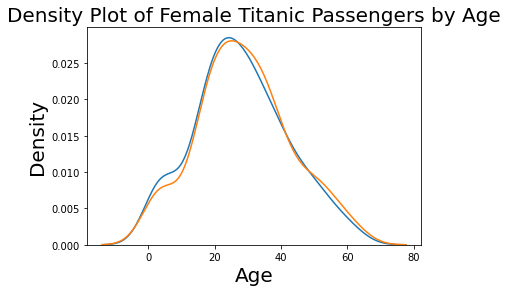

In [20]:
print(females["Survived"].value_counts())

sns.kdeplot(females['Age'], label = 'all females', shade = False, alpha = 0.8)
sns.kdeplot(survived_females['Age'], label = 'survived females', shade = False, alpha = 0.8)

# label the plot
plt.xlabel('Age', size = 20)
plt.ylabel('Density', size = 20)
plt.title('Density Plot of Female Titanic Passengers by Age', size = 20)

0    468
1    109
Name: Survived, dtype: int64


Text(0.5, 1.0, 'Density Plot of Male Titanic Passengers by Age')

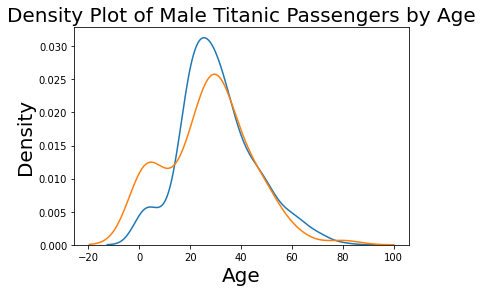

In [21]:
print(males["Survived"].value_counts())

sns.kdeplot(males['Age'], label = 'all males', shade = False, alpha = 0.8)
sns.kdeplot(survived_males['Age'], label = 'survived males', shade = False, alpha = 0.8)

# label the plot
plt.xlabel('Age', size = 20); plt.ylabel('Density', size = 20)
plt.title('Density Plot of Male Titanic Passengers by Age', size = 20)

#### Survived by Pclass

In [22]:
df_train.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [23]:
df_train.groupby(['Pclass']).Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [24]:
df_by_class = df_train.groupby('Pclass')
df_by_class.describe()

PassengerId                          ...     Fare                
             count        mean         std  ...      50%   75%       max
Pclass                                      ...                         
1            216.0  461.597222  246.737616  ...  60.2875  93.5  512.3292
2            184.0  445.956522  250.852161  ...  14.2500  26.0   73.5000
3            491.0  439.154786  264.441453  ...   8.0500  15.5   69.5500

[3 rows x 48 columns]

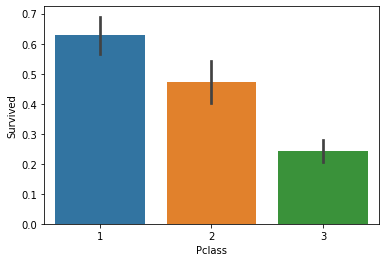

In [25]:
sns.barplot(x='Pclass', y='Survived', data=df_train)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


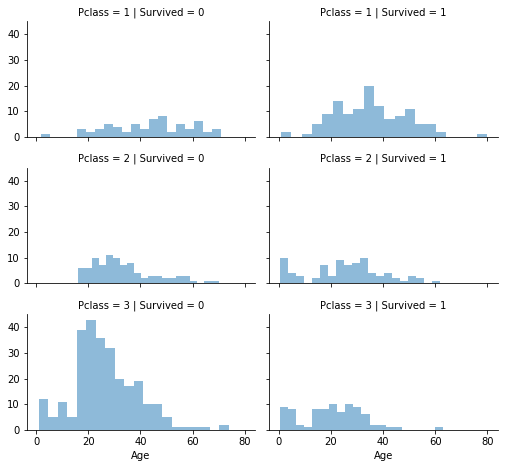

In [26]:
grid = sns.FacetGrid(df_train, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

#### Survived by Age

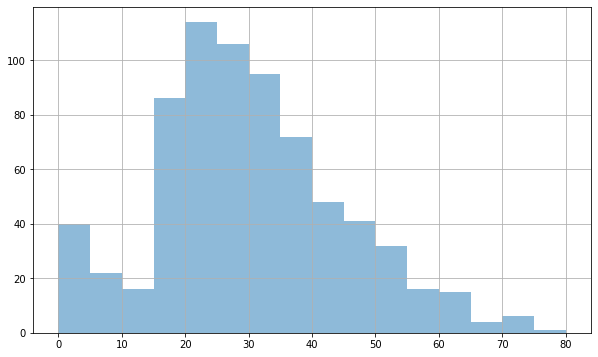

In [27]:
#df_train['Age'].hist()
df_train['Age'].dropna().hist(bins=16, range=(0,80), alpha = .5, figsize=(10,6))

In [28]:
ser, bins = pd.qcut(df_train.Age.dropna(), 5, retbins=True, labels=False)
print(bins)
df_train.groupby(ser).Survived.value_counts()

[ 0.42 19.   25.   31.8  41.   80.  ]


Age  Survived
0.0  0           85
     1           79
1.0  0           92
     1           45
2.0  0           77
     1           50
3.0  0           81
     1           63
4.0  0           89
     1           53
Name: Survived, dtype: int64

#### Sex and Pclass

In [29]:
df_train.groupby(['Pclass']).Sex.value_counts()

Pclass  Sex   
1       male      122
        female     94
2       male      108
        female     76
3       male      347
        female    144
Name: Sex, dtype: int64

In [30]:
df_train.groupby(['Pclass','Sex']).Survived.value_counts()

Pclass  Sex     Survived
1       female  1            91
                0             3
        male    0            77
                1            45
2       female  1            70
                0             6
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: Survived, dtype: int64

In [31]:
id = pd.crosstab([df_train.Pclass, df_train.Sex], df_train.Survived.astype(float))
id.columns = (['No', 'Yes'])
id.columns.name = "Survived"
id.div(id.sum(1).astype(float), 0)

Survived             No       Yes
Pclass Sex                       
1      female  0.031915  0.968085
       male    0.631148  0.368852
2      female  0.078947  0.921053
       male    0.842593  0.157407
3      female  0.500000  0.500000
       male    0.864553  0.135447

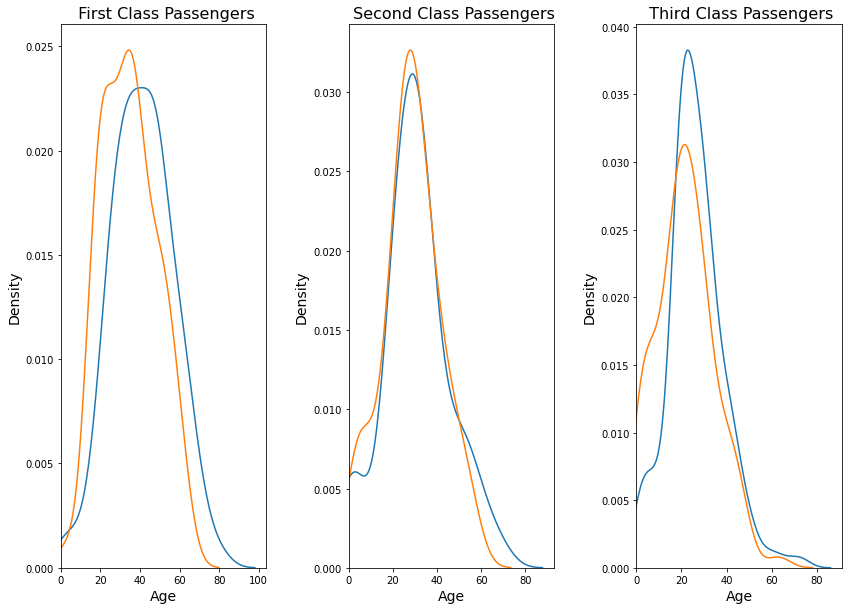

In [32]:
# Set-up 3x2 grid for plotting.

fig, sub = plt.subplots(1,3, figsize=(14,10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

titles = [" First Class "," Second Class "," Third Class "]

for i, title, ax in zip([1,2,3], titles, sub.flatten()):
    male_data = males[males['Pclass']==i]
    female_data = females[females['Pclass']==i]
    
    plt_title = title + 'Passengers'
    sns.kdeplot(male_data['Age'],
               label = 'male', shade = False, alpha = 0.8,ax=ax);
    sns.kdeplot(female_data['Age'],
               label = 'female', shade = False, alpha = 0.8, ax=ax)
    
    ax.set_xlabel('Age', size = 14)
    ax.set_ylabel('Density', size = 14)
    ax.set_title(plt_title, size = 16)
    ax.set(xlim=(0))
  
plt.show()

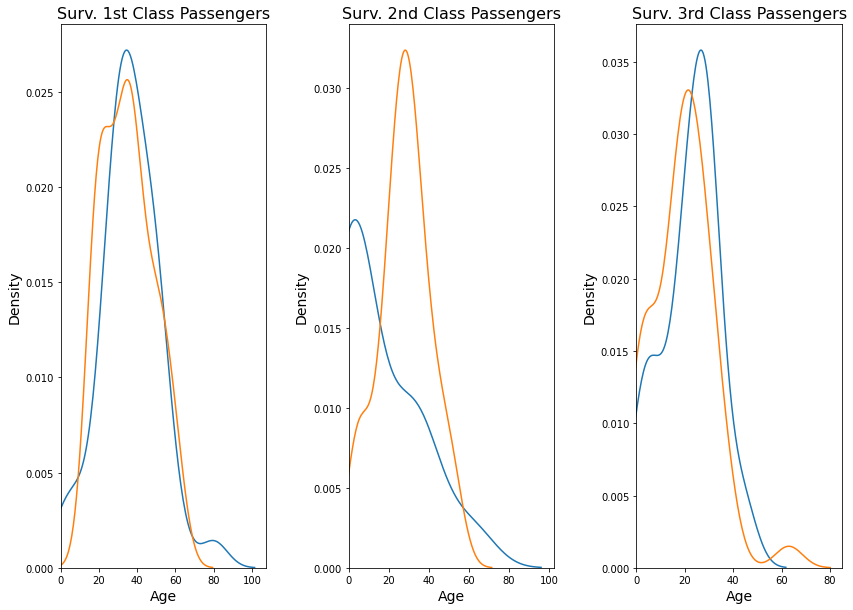

In [33]:
# Set-up 3x2 grid for plotting.

fig, sub = plt.subplots(1,3, figsize=(14,10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

titles = [" 1st Class "," 2nd Class "," 3rd Class "]

for i, title, ax in zip([1,2,3], titles, sub.flatten()):
    male_data = survived_males[survived_males['Pclass']==i]
    female_data = survived_females[survived_females['Pclass']==i]
    
    plt_title = 'Surv.'+ title + 'Passengers'
    sns.kdeplot(male_data['Age'],
               label = 'male', shade = False, alpha = 0.8,ax=ax);
    ax.set_xlabel('Age', size = 14)
    sns.kdeplot(female_data['Age'],
               label = 'female', shade = False, alpha = 0.8, ax=ax)
    ax.set_xlabel('Age', size = 14)
    ax.set_ylabel('Density', size = 14)
    ax.set_title(plt_title, size = 16)
    ax.set(xlim=(0))
  
plt.show()

#### Dealing with missing values

In [34]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent_1 = df_train.isnull().sum()/df_train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


#### Codifying "Sex" field

In [35]:
df_train['Gender'] = df_train['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
df_test['Gender'] = df_test['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

#### Filling the null values for Age

In [36]:
print(len(df_train[df_train['Age'].isnull()]))
print(len(df_test[df_test['Age'].isnull()]))

177
86


In [37]:
df_train['AgeFill'] = df_train['Age']
df_test['AgeFill'] = df_test['Age']

In [38]:
df_train[df_train['Age'].isnull()][['Gender','Pclass','Age','AgeFill']].head(4)

,Gender,Pclass,Age,AgeFill
5,1,3,NaN,NaN
17,1,2,NaN,NaN
19,0,3,NaN,NaN
26,1,3,NaN,NaN


In [39]:
median_ages = np.zeros((2,3))
for i in range(0, 2):
    for j in range(0, 3):
        median_ages[i,j] = df_train[(df_train['Gender'] == i) & (df_train['Pclass'] == j+1)]['Age'].dropna().median()

median_ages

array([[35. , 28. , 21.5],
       [40. , 30. , 25. ]])

In [40]:
for i in range(0, 2):
    for j in range(0, 3):
        df_train.loc[(df_train.Age.isnull()) & (df_train.Gender == i) & (df_train.Pclass == j+1),'AgeFill'] = median_ages[i,j]
        df_test.loc[(df_test.Age.isnull()) & (df_test.Gender == i) & (df_test.Pclass == j+1),'AgeFill'] = median_ages[i,j]

In [41]:
df_train[df_train['Age'].isnull()][['Gender','Pclass','Age','AgeFill']].head(4)

,Gender,Pclass,Age,AgeFill
5,1,3,NaN,25.0
17,1,2,NaN,30.0
19,0,3,NaN,21.5
26,1,3,NaN,25.0


#### Filling the null values for "Embarked"

In [42]:
df_train[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,AgeFill
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0,38.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0,62.0


In [43]:
df_train[59:64]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,AgeFill
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S,1,11.0
60,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C,1,22.0
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN,0,38.0
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,C83,S,1,45.0
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,NaN,S,1,4.0


In [44]:
df_train[826:832]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,AgeFill
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S,1,25.00
827,828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C,1,1.00
828,829,1,3,"McCormack, Mr. Thomas Joseph",male,NaN,0,0,367228,7.7500,NaN,Q,1,25.00
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.00,0,0,113572,80.0000,B28,NaN,0,62.00
830,831,1,3,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.00,1,0,2659,14.4542,NaN,C,0,15.00
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S,1,0.83


##### Associating the missing values to the most likely class

In [45]:
df_train['Embarked'] = df_train['Embarked'].map({np.nan:1,'C':1, 'Q':2,'S':3} ).astype(int)
df_test['Embarked'] = df_test['Embarked'].map({np.nan:1,'C':1, 'Q':2,'S':3} ).astype(int)

#### One-Hot-Enconding the field "Embarked"

In [46]:
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer
lb = LabelBinarizer()
mlb = MultiLabelBinarizer()

In [47]:
df_train.groupby(['Embarked']).Survived.value_counts()

Embarked  Survived
1         1            95
          0            75
2         0            47
          1            30
3         0           427
          1           217
Name: Survived, dtype: int64

In [48]:
df_train.groupby(['Embarked']).Fare.mean()

Embarked
1    60.189978
2    13.276030
3    27.079812
Name: Fare, dtype: float64

In [49]:
embarked = pd.DataFrame(lb.fit_transform(df_train['Embarked'].values), columns=['Emb1','Emb2','Emb3'])
df_train = pd.concat([df_train, embarked], axis=1)

In [50]:
embarked = pd.DataFrame(lb.fit_transform(df_test['Embarked'].values), columns=['Emb1','Emb2','Emb3'])
df_test = pd.concat([df_test, embarked], axis=1)

#### One-Hot-Enconding the field "Cabin"

In [51]:
df_train['Cabin'].value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
F33            3
E101           3
              ..
C95            1
E77            1
A26            1
D30            1
C104           1
Name: Cabin, Length: 147, dtype: int64

In [52]:
CabinTrans = pd.DataFrame(mlb.fit_transform([{str(val)} for val in df_train['Cabin'].values]))

In [53]:
CabinTrans.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


#### We give up using the Cabin feature as is, using traditional hot-encoding...

In [54]:
#df_train = pd.concat([df_train, CabinTrans], axis=1)

... but
After doing some research, we could know that a cabin number looks like ‘C123’ and the letter refers to the deck. Therefore we’re could extract these and create a new feature, that contains a persons deck. Afterwords we will convert the feature into a numeric variable.

In [55]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [df_train, df_test]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)

In [56]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,AgeFill,Emb1,Emb2,Emb3,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,3,1,22.0,0,0,1,8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,38.0,1,0,0,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,3,0,26.0,0,0,1,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,3,0,35.0,0,0,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,3,1,35.0,0,0,1,8


#### Creating a feature for number of relatives

In [57]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch']
df_train['Age*Class'] = df_train.AgeFill * df_train.Pclass

df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch']
df_test['Age*Class'] = df_test.AgeFill * df_test.Pclass

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


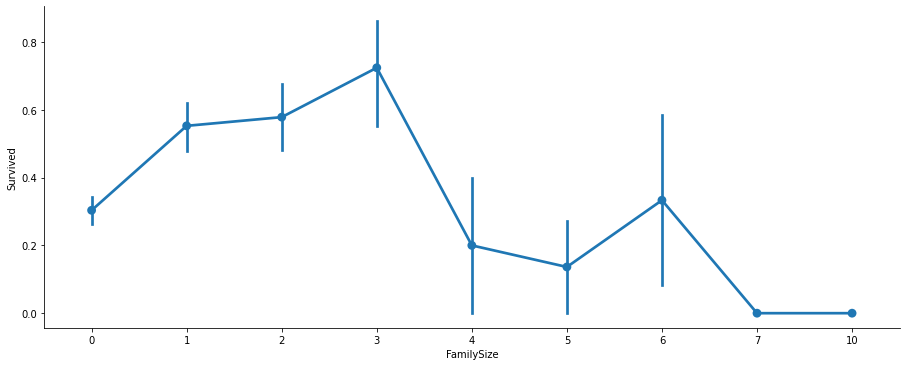

In [58]:
axes = sns.catplot('FamilySize','Survived', data=df_train, aspect = 2.5, kind="point")

#### Extract the Titles from "Name", so that we can build a new feature out of that. (TBD)

data = [df_train, df_test]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)

#### Fare per Person (TBD)

for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['FamilySize']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

df_train.head(10)

#### Ticket

In [59]:
df_train['Ticket'].describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

Since the Ticket attribute has 681 unique tickets, it will be a bit tricky to convert them into useful categories. So we will drop it from the dataset.

#### Discarding unused columns for predictive analysis

In [60]:
df_train2 = df_train.drop(['Age','Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)
df_train2 = df_train2.dropna()

df_test2 = df_test.drop(['Age','Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)
df_test2 = df_test2.dropna()

In [61]:
df_train2.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Gender,AgeFill,Emb1,Emb2,Emb3,Deck,FamilySize,Age*Class
0,1,0,3,1,0,7.2500,1,22.0,0,0,1,8,1,66.0
1,2,1,1,1,0,71.2833,0,38.0,1,0,0,3,1,38.0
2,3,1,3,0,0,7.9250,0,26.0,0,0,1,8,0,78.0
3,4,1,1,1,0,53.1000,0,35.0,0,0,1,3,1,35.0
4,5,0,3,0,0,8.0500,1,35.0,0,0,1,8,0,105.0


In [62]:
df_test2.head()

,PassengerId,Pclass,SibSp,Parch,Fare,Gender,AgeFill,Emb1,Emb2,Emb3,Deck,FamilySize,Age*Class
0,892,3,0,0,7.8292,1,34.5,0,1,0,8,0,103.5
1,893,3,1,0,7.0000,0,47.0,0,0,1,8,1,141.0
2,894,2,0,0,9.6875,1,62.0,0,1,0,8,0,124.0
3,895,3,0,0,8.6625,1,27.0,0,0,1,8,0,81.0
4,896,3,1,1,12.2875,0,22.0,0,0,1,8,2,66.0


In [63]:
df_test2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Pclass       417 non-null    int64  
 2   SibSp        417 non-null    int64  
 3   Parch        417 non-null    int64  
 4   Fare         417 non-null    float64
 5   Gender       417 non-null    int64  
 6   AgeFill      417 non-null    float64
 7   Emb1         417 non-null    int64  
 8   Emb2         417 non-null    int64  
 9   Emb3         417 non-null    int64  
 10  Deck         417 non-null    int64  
 11  FamilySize   417 non-null    int64  
 12  Age*Class    417 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 45.6 KB


In [64]:
df_test2.columns

Index(['PassengerId', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Gender', 'AgeFill',
       'Emb1', 'Emb2', 'Emb3', 'Deck', 'FamilySize', 'Age*Class'],
      dtype='object')

#### Creating one-hot encoding

The datas with suffix "num" will deal with all variables as numeric, the data with suffix "cat" will treat in a differ way the categorical variables.

In [65]:
categorical_var = ['Pclass', 'SibSp', 'FamilySize', 'Deck']
df_train_num = df_train2.drop(columns = ['PassengerId', 'Survived'])
df_train_cat = df_train_num.copy()
y_train = df_train2.Survived
df_train_cat = pd.get_dummies(df_train_num, columns = categorical_var, drop_first = True)

df_test_num = df_test2.drop(columns = ['PassengerId'])
df_test_cat = df_test_num.copy()
df_test_cat = pd.get_dummies(df_test_cat, columns = categorical_var, drop_first= True)
#There is no deck 1 in test data
df_test_cat['Deck_1'] = 0
df_test_cat = df_test_cat[df_train_cat.columns]

#### Running some correlation hypothesis:

In [66]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
## https://github.com/statsmodels/statsmodels/issues/3931 waiting for fixes

y = y_train
X = df_train_cat.Gender
model = sm.Logit(y, X)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.558118
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      890
Method:                           MLE   Df Model:                            0
Date:                Thu, 12 Nov 2020   Pseudo R-squ.:                  0.1619
Time:                        15:51:21   Log-Likelihood:                -497.28
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Gender        -1.4571      0.106    -13.701      0.000      -1.666      -1.249


In [67]:
y = df_train2.Survived
X = df_train2[['Gender','Pclass','AgeFill']]
model = sm.Logit(y, X)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.529672
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      888
Method:                           MLE   Df Model:                            2
Date:                Thu, 12 Nov 2020   Pseudo R-squ.:                  0.2046
Time:                        15:51:21   Log-Likelihood:                -471.94
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.910e-53
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Gender        -2.1764      0.170    -12.829      0.000      -2.509      -1.844
Pclass        -0.0671      0.

#### Preparing Data for predictions

In [68]:
train_data_num = df_train_num.values
train_data_cat = df_train_cat.values
print(train_data_cat.shape)
train_data_cat

(891, 32)


array([[ 0.    ,  7.25  ,  1.    , ...,  0.    ,  0.    ,  1.    ],
       [ 0.    , 71.2833,  0.    , ...,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  7.925 ,  0.    , ...,  0.    ,  0.    ,  1.    ],
       ...,
       [ 2.    , 23.45  ,  0.    , ...,  0.    ,  0.    ,  1.    ],
       [ 0.    , 30.    ,  1.    , ...,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  7.75  ,  1.    , ...,  0.    ,  0.    ,  1.    ]])

In [69]:
test_data_num = df_test_num.values
test_data_cat = df_test_cat.values
print(test_data_cat.shape)
test_data_cat

(417, 32)


array([[ 0.    ,  7.8292,  1.    , ...,  0.    ,  0.    ,  1.    ],
       [ 0.    ,  7.    ,  0.    , ...,  0.    ,  0.    ,  1.    ],
       [ 0.    ,  9.6875,  1.    , ...,  0.    ,  0.    ,  1.    ],
       ...,
       [ 0.    ,  7.25  ,  1.    , ...,  0.    ,  0.    ,  1.    ],
       [ 0.    ,  8.05  ,  1.    , ...,  0.    ,  0.    ,  1.    ],
       [ 1.    , 22.3583,  1.    , ...,  0.    ,  0.    ,  1.    ]])

#### Adjusting features scales:   
http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html  

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_variables = [0, 1, 3, 7]
X_train_cat = train_data_cat.copy()
X_train_num = train_data_num.copy()
X_test_cat = test_data_cat.copy()
X_test_num = test_data_num.copy()

for n in numerical_variables:
    X_train_cat[:, n] = scaler.fit_transform(X_train_cat[:, n].reshape(-1, 1)).reshape(-1)
    X_test_cat[:, n] = scaler.fit_transform(X_test_cat[:, n].reshape(-1, 1)).reshape(-1)

X_train_num = scaler.fit_transform(X_train_num)
X_test_num = scaler.fit_transform(X_test_num)

In [71]:
print("X_train_cat", X_train_cat.shape)
print("X_train_num", X_train_num.shape)
print("X_test_cat", X_test_cat.shape)
print("X_test_num", X_test_num.shape)
print("y_train", y_train.shape)

X_train_cat (891, 32)
X_train_num (891, 12)
X_test_cat (417, 32)
X_test_num (417, 12)
y_train (891,)


http://stats.stackexchange.com/questions/95797/how-to-split-the-dataset-for-cross-validation-learning-curve-and-final-evaluat  
http://scikit-learn.org/stable/modules/cross_validation.html  

#### Importing modules for cross validation and evaluation of the models

In [72]:
from sklearn import model_selection

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve

#### Creating functions to help evaluate the models

In [73]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def clf_eval(clf, X, y_true, classes=['Não Sobreviveu', 'Sobreviveu']):
    y_pred = clf.predict(X)
    clf_matrix = confusion_matrix(y_true, y_pred)
    print('Classification Report')
    print(classification_report(y_true, y_pred, target_names=classes))
    print('ROC Score: {}'.format(roc_auc_score(y_true, y_pred)))
    print('Accuracy Score: {}'.format(accuracy_score(y_true, y_pred)))
    print('Average Precision Score: {}'.format(average_precision_score(y_true, y_pred)))
    print('f1 Score: {}'.format(f1_score(y_true, y_pred)))
    plot_confusion_matrix(clf_matrix, classes=classes)
    return roc_auc_score(y_true, y_pred)

#### Creating cross-validation with subsets (70% train / 30% test):  

http://scikit-learn.org/stable/modules/cross_validation.html  
http://www.analyticsvidhya.com/blog/2015/05/k-fold-cross-validation-simple/  
http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.cross_val_score.html  
http://stackoverflow.com/questions/25375203/identical-learning-curves-on-subsequent-runs-using-shufflesplit  
http://stackoverflow.com/questions/28064634/random-state-pseudo-random-numberin-scikit-learn  

In [74]:
X_traincv_num, X_testcv_num, y_traincv_num, y_testcv_num = model_selection.train_test_split(X_train_num,
                                                                            y_train,
                                                                            test_size=0.3,
                                                                            random_state=0)

X_traincv_cat, X_testcv_cat, y_traincv_cat, y_testcv_cat = model_selection.train_test_split(X_train_cat,
                                                                            y_train,
                                                                            test_size=0.3,
                                                                            random_state=0)

#### Check if classes are balanced

In [75]:
print(len(y_traincv_cat[y_traincv_cat == 0]))
print(len(y_traincv_cat[y_traincv_cat == 1]))

381
242


#### Oversampling the minority class  
http://contrib.scikit-learn.org/imbalanced-learn/  

In [76]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_traincv_res, y_traincv_res = smote.fit_sample(X_traincv_cat, y_traincv_cat)

In [77]:
print(len(y_traincv_res[y_traincv_res == 0]))
print(len(y_traincv_res[y_traincv_res == 1]))

381
381


#### Creating another train/test set using k-fold or other cross-validation method:  

In [78]:
cv = model_selection.StratifiedKFold(n_splits=10)

def mean_scores_cv(clf, cv, X, y):
    scores = model_selection.cross_val_score(clf, X, y, 
                                              scoring=None, 
                                              cv=cv, 
                                              n_jobs=1,
                                              verbose=0,
                                              fit_params=None,
                                              pre_dispatch='2*n_jobs')
    return scores.mean()

#### Testing some classifiers:  

### Linear (or Polynomial) Classifiers

A linear classifier achieves this by making a classification decision based on the value of a linear combination of the characteristics. An object's characteristics are also known as feature values and are typically presented to the machine in a vector called a feature vector. Such classifiers work well for practical problems such as document classification, and more generally for problems with many variables (features), reaching accuracy levels comparable to non-linear classifiers while taking less time to train and use.

#### Support Vector Machines  

Support vector machines (SVMs, also support vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier. An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall.

In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces.

#### Choosing the best parameters using GridSearchCV and RandomizedSearchCV  
http://scikit-learn.org/stable/modules/grid_search.html  

In [79]:
#http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn import svm


estimator = svm.SVC()
cv = model_selection.StratifiedKFold(n_splits=3)

kernels = ['linear', 'poly']
Cs = np.linspace(0.1,2,8)
degrees = [2,3,4]
gammas = np.logspace(-5, 0, 8)

param_grid=dict(kernel=kernels, C=Cs, gamma=gammas, degree=degrees)

clf_svc = model_selection.RandomizedSearchCV(estimator=estimator,
                                             cv=cv,
                                             param_distributions=param_grid, 
                                             n_jobs=-1).fit(X_train_cat, y_train)

with open(os.path.join(outputs,'best_parameters_svm.pickle'), 'wb') as f:
    pickle.dump(clf_svc,f)

with open(os.path.join(outputs,'best_parameters_svm.pickle'), 'rb') as f:
    clf_svc = pickle.load(f)

print(clf_svc.best_score_)
print(clf_svc.best_estimator_.kernel)
print(clf_svc.best_estimator_.C)
print(clf_svc.best_estimator_.degree)
print(clf_svc.best_estimator_.gamma)

0.8181818181818182
poly
2.0
3
0.19306977288832497


Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.82      0.88      0.85       168
    Sobreviveu       0.76      0.68      0.72       100

      accuracy                           0.80       268
     macro avg       0.79      0.78      0.78       268
  weighted avg       0.80      0.80      0.80       268

ROC Score: 0.7775000000000001
Accuracy Score: 0.8022388059701493
Average Precision Score: 0.6389535468723797
f1 Score: 0.7195767195767195
Confusion matrix, without normalization
[[147  21]
 [ 32  68]]


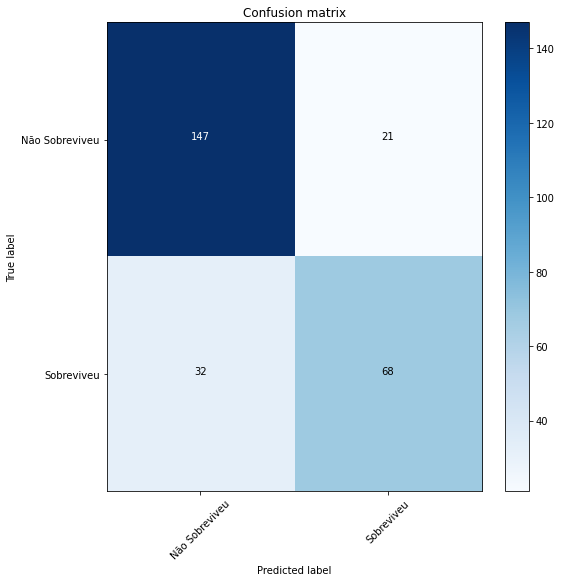

In [80]:
#http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
clf_svc2 = svm.SVC(kernel=clf_svc.best_estimator_.kernel,
                   C=clf_svc.best_estimator_.C,
                   degree=clf_svc.best_estimator_.degree, 
                   gamma=clf_svc.best_estimator_.gamma, 
                   coef0=0.0, 
                   shrinking=True, 
                   probability=False, 
                   tol=0.001, 
                   cache_size=200, 
                   class_weight=None, 
                   verbose=False, 
                   max_iter=-1, 
                   random_state=0).fit(X_traincv_cat, y_traincv_cat)

roc_svc2 = clf_eval(clf_svc2, X_testcv_cat, y_testcv_cat)

For this first classifier, we'll also display the learning curve  
http://scikit-learn.org/stable/modules/generated/sklearn.learning_curve.learning_curve.html  

In [81]:
#http://scikit-learn.org/stable/modules/generated/sklearn.learning_curve.learning_curve.html

def plot_learning_curve(estimator, 
                        title, 
                        X, 
                        y, 
                        ylim=None, 
                        cv=None,
                        n_jobs=-1, 
                        train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure(figsize=(16,8))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = model_selection.learning_curve(estimator, 
                                                            X, y, cv=cv, 
                                                            n_jobs=n_jobs, 
                                                            train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

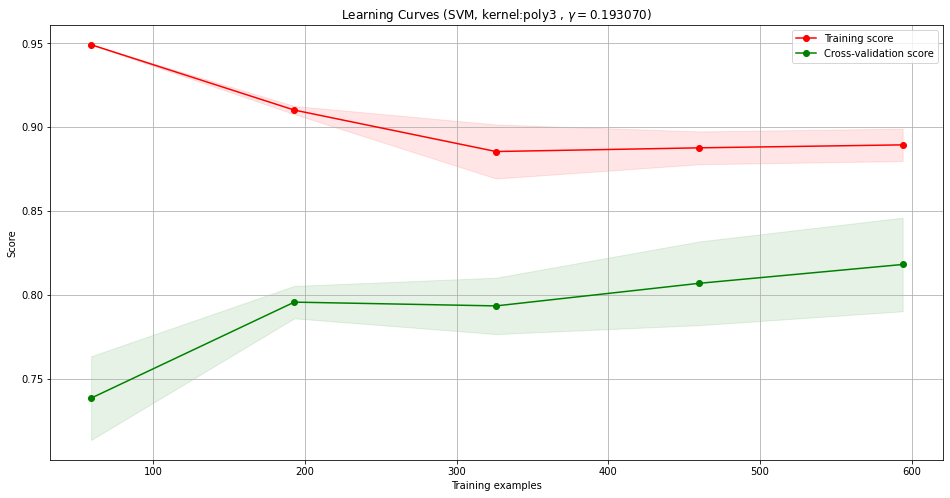

In [82]:
title = 'Learning Curves (SVM, kernel:{1}{0} , $\gamma={2:.6f}$)'.format(clf_svc.best_estimator_.degree,
                                                                         clf_svc.best_estimator_.kernel,
                                                                         clf_svc.best_estimator_.gamma)
graph = plot_learning_curve(clf_svc2, title, X_train_cat, y_train, cv=cv)
#matplotlib.rcdefaults()
#matplotlib.verbose.set_level('silent')
graph.show()

#### Logistic Regression

Logistic regression, or logit regression, or logit model is a regression model where the dependent variable (DV) is categorical. In the binary case, a dependent variable (the output) can take only two values, "0" and "1", which represent outcomes such as pass/fail, win/lose, alive/dead or healthy/sick. Cases where the dependent variable has more than two outcome categories may be analysed in multinomial logistic regression, or, if the multiple categories are ordered, in ordinal logistic regression.

Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.82      0.88      0.85       168
    Sobreviveu       0.77      0.68      0.72       100

      accuracy                           0.81       268
     macro avg       0.80      0.78      0.79       268
  weighted avg       0.80      0.81      0.80       268

ROC Score: 0.7804761904761905
Accuracy Score: 0.8059701492537313
Average Precision Score: 0.6448575305291724
f1 Score: 0.7234042553191491
Confusion matrix, without normalization
[[148  20]
 [ 32  68]]


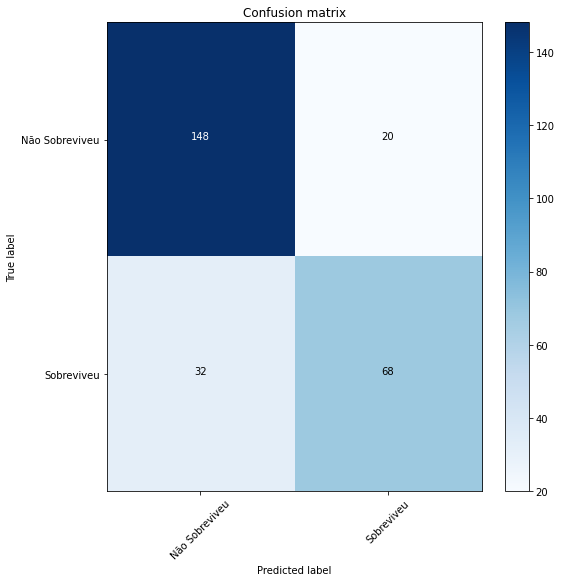

In [83]:
#http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(penalty='l2',
                            dual=False, 
                            tol=0.001, 
                            C=0.10, 
                            fit_intercept=True, 
                            intercept_scaling=1, 
                            class_weight=None, 
                            random_state=0, 
                            solver='saga', 
                            max_iter=100, 
                            multi_class='ovr', 
                            verbose=0, 
                            warm_start=False, 
                            n_jobs=-1).fit(X_traincv_cat, y_traincv_cat)

roc_lr = clf_eval(clf_lr, X_testcv_cat, y_testcv_cat)

##### Assessing the importance of the features

Gender          -1.712688
Age*Class       -0.448931
Pclass_3        -0.442633
Deck_8          -0.393409
FamilySize_4    -0.285406
SibSp_4         -0.271966
Emb3            -0.243234
SibSp_3         -0.210572
Deck_3          -0.151974
FamilySize_10   -0.147437
SibSp_8         -0.147437
Parch           -0.133501
FamilySize_5    -0.102572
FamilySize_6    -0.089456
AgeFill         -0.077073
FamilySize_7    -0.075451
SibSp_2         -0.066932
SibSp_5         -0.060514
Deck_7          -0.033446
Deck_1          -0.000637
FamilySize_1     0.065333
Deck_6           0.081428
FamilySize_3     0.082425
Deck_4           0.112226
Deck_2           0.113645
Fare             0.115445
Emb2             0.133811
Emb1             0.168576
Pclass_2         0.189932
SibSp_1          0.294226
Deck_5           0.364639
FamilySize_2     0.377436
dtype: float64


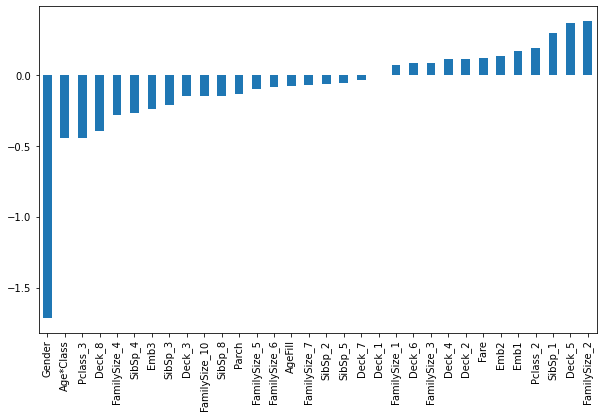

In [84]:
coefs = pd.Series(clf_lr.coef_[0], index=df_train_cat.columns)
coefs = coefs.sort_values()
coefs.plot(kind="bar", figsize=(10,6))
print(coefs.sort_values(ascending = True))

##### Precision Recall Curve

For each person the classifier algorithm has to classify, it computes a probability based on a function and it classifies the person as survived (when the score is bigger the than threshold) or as not survived (when the score is smaller than the threshold). That’s why the threshold plays an important part.

We will plot the precision and recall with the threshold using matplotlib:

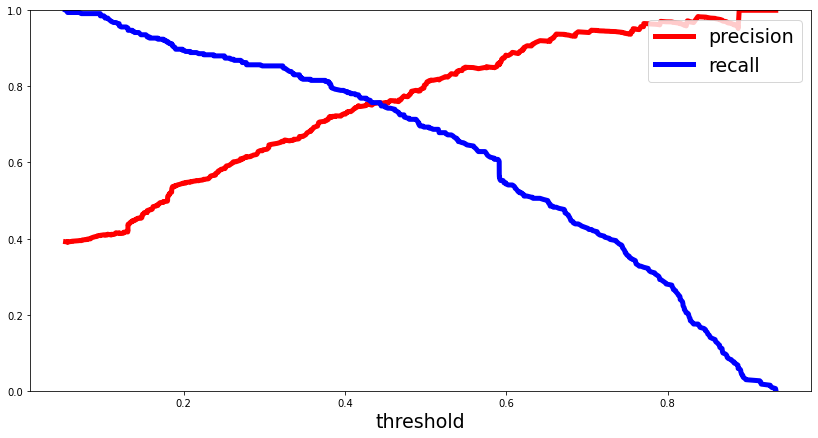

In [85]:
# getting the probabilities of our predictions
y_scores = clf_lr.predict_proba(X_train_cat)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)

def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

Another way is to plot the precision and recall against each other:

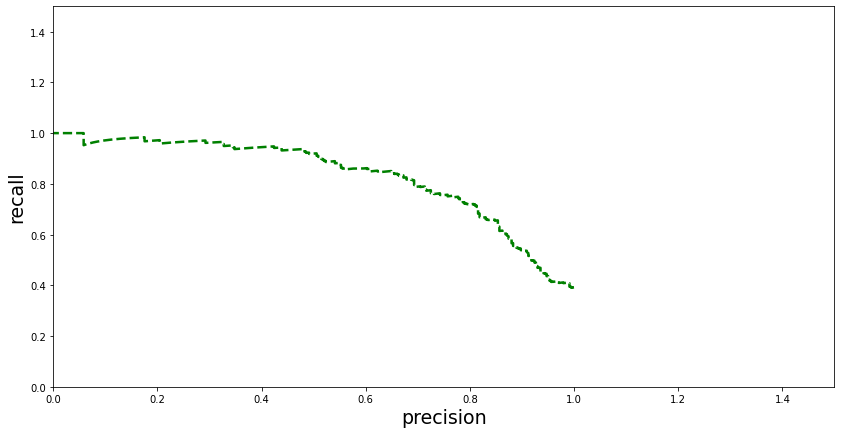

In [86]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

#### Ridge Classifier

Ridge Classifiers addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of coefficients. The ridge coefficients minimize a penalized residual sum of squares

Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.84      0.86      0.85       168
    Sobreviveu       0.75      0.72      0.73       100

      accuracy                           0.81       268
     macro avg       0.79      0.79      0.79       268
  weighted avg       0.80      0.81      0.81       268

ROC Score: 0.7885714285714286
Accuracy Score: 0.8059701492537313
Average Precision Score: 0.6444776119402985
f1 Score: 0.7346938775510204
Confusion matrix, without normalization
[[144  24]
 [ 28  72]]


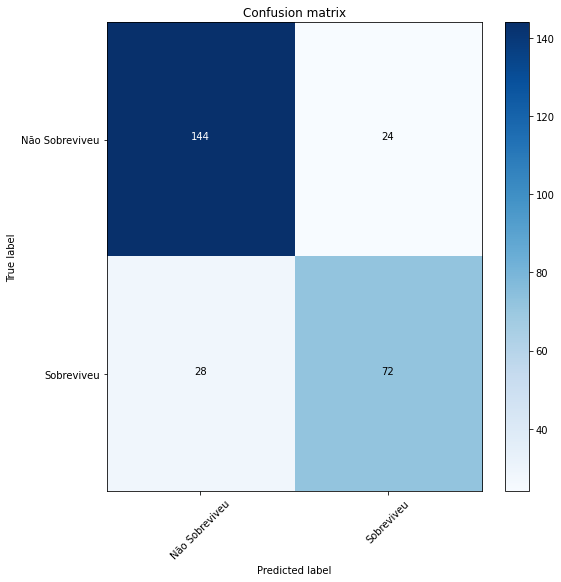

In [87]:
#http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html
from sklearn.linear_model import RidgeClassifier

clf_rdg = RidgeClassifier(alpha=1.0, 
                          fit_intercept=True, 
                          normalize=False, 
                          copy_X=True, 
                          max_iter=None, 
                          tol=0.001, 
                          class_weight=None, 
                          solver='auto', 
                          random_state=0).fit(X_traincv_cat, y_traincv_cat)

roc_rdg = clf_eval(clf_rdg, X_testcv_cat, y_testcv_cat)

Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.84      0.87      0.85       168
    Sobreviveu       0.77      0.72      0.74       100

      accuracy                           0.81       268
     macro avg       0.80      0.79      0.80       268
  weighted avg       0.81      0.81      0.81       268

ROC Score: 0.7945238095238095
Accuracy Score: 0.8134328358208955
Average Precision Score: 0.6559669736424261
f1 Score: 0.7422680412371133
Confusion matrix, without normalization
[[146  22]
 [ 28  72]]


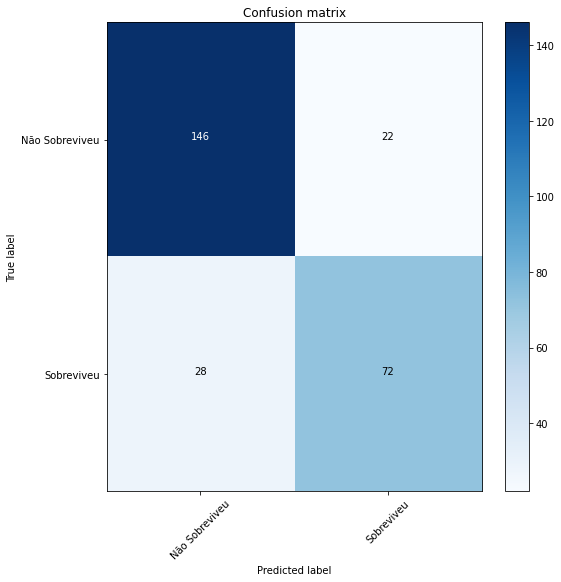

In [88]:
#http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html
from sklearn.linear_model import RidgeClassifierCV

clf_rdgcv = RidgeClassifierCV(alphas=(0.1, 1.0, 10.0), 
                            fit_intercept=True, 
                            normalize=False, 
                            scoring=None, 
                            cv=None, 
                            class_weight=None).fit(X_traincv_cat, y_traincv_cat)


roc_rdgcv = clf_eval(clf_rdgcv, X_testcv_cat, y_testcv_cat)

#### Perceptron 

Perceptron is an algorithm for supervised learning of binary classifiers (functions that can decide whether an input, represented by a vector of numbers, belongs to some specific class or not). It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. The algorithm allows for online learning, in that it processes elements in the training set one at a time.

Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.87      0.83      0.85       168
    Sobreviveu       0.73      0.79      0.76       100

      accuracy                           0.81       268
     macro avg       0.80      0.81      0.80       268
  weighted avg       0.82      0.81      0.81       268

ROC Score: 0.8086904761904762
Accuracy Score: 0.8134328358208955
Average Precision Score: 0.6562285793255942
f1 Score: 0.7596153846153846
Confusion matrix, without normalization
[[139  29]
 [ 21  79]]


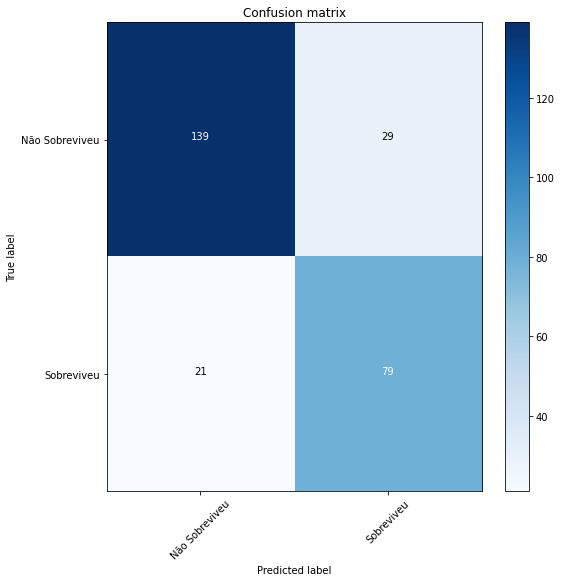

In [89]:
#http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron
from sklearn.linear_model import Perceptron

clf_pcp = Perceptron(penalty=None,
                     alpha=0.001,
                     fit_intercept=True,
                     max_iter=230,
                     shuffle=True,
                     verbose=0,
                     eta0=1.0,
                     n_jobs=-1, 
                     random_state=0, 
                     class_weight=None, 
                     warm_start=False).fit(X_traincv_cat, y_traincv_cat)

roc_pcp = clf_eval(clf_pcp, X_testcv_cat, y_testcv_cat)

#### Passive Aggressive

Passive Aggressive Algorithms are a family of online learning algorithms (for both classification and regression) proposed by Crammer at al. The idea is very simple and their performance has been proofed to be superior to many other alternative methods like Online Perceptron and MIRA (see the original paper in the reference section). Passive: if correct classification, keep the model; Aggressive: if incorrect classification, update to adjust to this misclassified example. In my mind, in passive, the information hidden in the example is not enough for updating; in aggressive, the information shows that at lest this time you are wrong, a better model should modify this mistake.  

https://www.bonaccorso.eu/2017/10/06/ml-algorithms-addendum-passive-aggressive-algorithms/  

Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.79      0.84      0.82       168
    Sobreviveu       0.70      0.63      0.66       100

      accuracy                           0.76       268
     macro avg       0.75      0.73      0.74       268
  weighted avg       0.76      0.76      0.76       268

ROC Score: 0.7346428571428572
Accuracy Score: 0.7611940298507462
Average Precision Score: 0.5790597014925373
f1 Score: 0.663157894736842
Confusion matrix, without normalization
[[141  27]
 [ 37  63]]


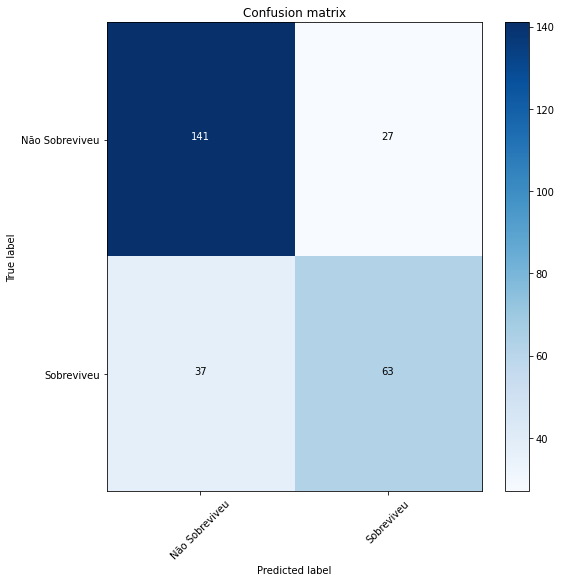

In [90]:
#http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.PassiveAggressiveClassifier.html
from sklearn.linear_model import PassiveAggressiveClassifier

clf_pac = PassiveAggressiveClassifier(C=0.1, 
                                      fit_intercept=True, 
                                      max_iter=100, 
                                      shuffle=True, 
                                      verbose=0, 
                                      loss='hinge', 
                                      n_jobs=-1, 
                                      random_state=0, 
                                      warm_start=False, 
                                      class_weight=None).fit(X_traincv_cat, y_traincv_cat)

roc_pac = clf_eval(clf_pac, X_testcv_cat, y_testcv_cat)

#### SGDC Classifier

The SGDC classifier is a linear classifier (SVM, logistic regression) with SGD training. Implements regularized linear models with stochastic gradient descent (SGD) learning: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate). SGD allows minibatch (online/out-of-core) learning, see the partial_fit method. For best results using the default learning rate schedule, the data should have zero mean and unit variance.  

The regularizer is a penalty added to the loss function that shrinks model parameters towards the zero vector using either the squared euclidean norm L2 or the absolute norm L1 or a combination of both (Elastic Net). If the parameter update crosses the 0.0 value because of the regularizer, the update is truncated to 0.0 to allow for learning sparse models and achieve online feature selection.  

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.82      0.84      0.83       168
    Sobreviveu       0.72      0.70      0.71       100

      accuracy                           0.79       268
     macro avg       0.77      0.77      0.77       268
  weighted avg       0.79      0.79      0.79       268

ROC Score: 0.7696428571428572
Accuracy Score: 0.7873134328358209
Average Precision Score: 0.6170949376827204
f1 Score: 0.7106598984771574
Confusion matrix, without normalization
[[141  27]
 [ 30  70]]


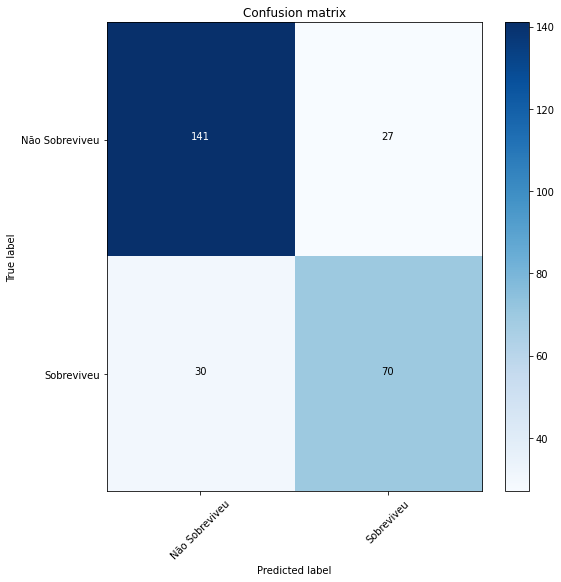

In [91]:
from sklearn.linear_model import SGDClassifier

clf_sgdc = SGDClassifier(loss='hinge',
                         penalty='l2', 
                         alpha=0.0001,
                         l1_ratio=0.15, 
                         fit_intercept=True,
                         max_iter=200, 
                         shuffle=True,
                         verbose=0,
                         epsilon=0.1,
                         n_jobs=-1,
                         random_state=0,
                         learning_rate='optimal',
                         eta0=0.0, 
                         power_t=0.5,
                         class_weight=None,
                         warm_start=False, 
                         average=False).fit(X_traincv_cat, y_traincv_cat)

roc_sgdc = clf_eval(clf_sgdc, X_testcv_cat, y_testcv_cat)

#### k-Nearest Neighbors

k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression:

+ In k-NN classification, the output is a class membership. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

+ In k-NN regression, the output is the property value for the object. This value is the average of the values of its k nearest neighbors.

k-NN is a type of instance-based learning, or lazy learning, where the function is only approximated locally and all computation is deferred until classification. The k-NN algorithm is among the simplest of all machine learning algorithms.

Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.78      0.89      0.83       168
    Sobreviveu       0.76      0.58      0.66       100

      accuracy                           0.78       268
     macro avg       0.77      0.74      0.75       268
  weighted avg       0.77      0.78      0.77       268

ROC Score: 0.7364285714285714
Accuracy Score: 0.7761194029850746
Average Precision Score: 0.5993479968578163
f1 Score: 0.6590909090909091
Confusion matrix, without normalization
[[150  18]
 [ 42  58]]


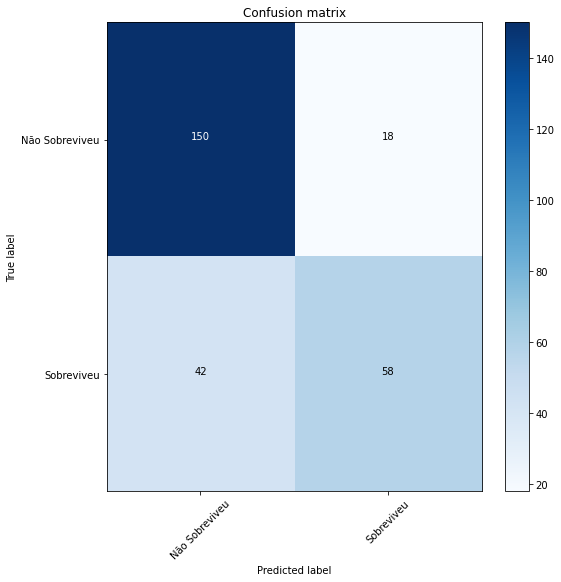

In [92]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors=25,
                               weights='uniform', 
                               algorithm='auto', 
                               leaf_size=30, 
                               p=4, 
                               metric='minkowski', 
                               metric_params=None, 
                               n_jobs=-1).fit(X_traincv_cat, y_traincv_cat)

roc_knn = clf_eval(clf_knn, X_testcv_cat, y_testcv_cat)

#### Decision Trees

Decision tree learning uses a decision tree (as a predictive model) to go from observations about an item (represented in the branches) to conclusions about the item's target value (represented in the leaves). Tree models where the target variable can take a discrete set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees.

Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.84      0.84      0.84       168
    Sobreviveu       0.73      0.74      0.74       100

      accuracy                           0.80       268
     macro avg       0.79      0.79      0.79       268
  weighted avg       0.80      0.80      0.80       268

ROC Score: 0.7896428571428572
Accuracy Score: 0.8022388059701493
Average Precision Score: 0.6391931431949165
f1 Score: 0.7363184079601991
Confusion matrix, without normalization
[[141  27]
 [ 26  74]]


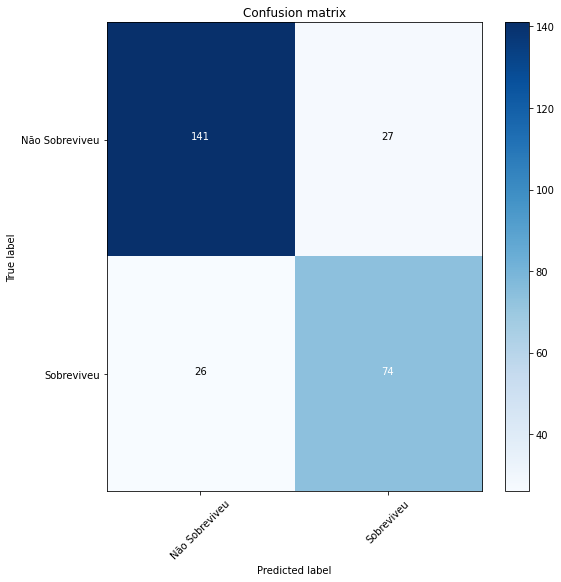

In [93]:
# http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier

clf_dtc = DecisionTreeClassifier(criterion='gini', 
                                 splitter='best', 
                                 max_depth=None, 
                                 min_samples_split=3, 
                                 min_samples_leaf=1, 
                                 min_weight_fraction_leaf=0.0, 
                                 max_features=None, 
                                 random_state=0, 
                                 max_leaf_nodes=None, 
                                 class_weight=None,).fit(X_traincv_cat, y_traincv_cat)

roc_dtc = clf_eval(clf_dtc, X_testcv_cat, y_testcv_cat)

### Ensemble Classifiers

A linear classifier achieves this by making a classification decision based on the value of a linear combination of the characteristics. An object's characteristics are also known as feature values and are typically presented to the machine in a vector called a feature vector. Such classifiers work well for practical problems such as document classification, and more generally for problems with many variables (features), reaching accuracy levels comparable to non-linear classifiers while taking less time to train and use.

We have many type of ensembles: Bagging, Boosting, Voting and Stacking  

#### Bagging

Bootstrap aggregating, also called bagging, is a machine learning ensemble meta-algorithm designed to improve the stability and accuracy of machine learning algorithms used in statistical classification and regression. It also reduces variance and helps to avoid overfitting. Although it is usually applied to decision tree methods, it can be used with any type of method. Bagging is a special case of the model averaging approach. Random Forests are the most common type of bagging algorithms.

#### Random Forests

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set.

Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.83      0.88      0.85       168
    Sobreviveu       0.77      0.70      0.73       100

      accuracy                           0.81       268
     macro avg       0.80      0.79      0.79       268
  weighted avg       0.81      0.81      0.81       268

ROC Score: 0.7875
Accuracy Score: 0.8097014925373134
Average Precision Score: 0.6504018369690011
f1 Score: 0.7329842931937172
Confusion matrix, without normalization
[[147  21]
 [ 30  70]]


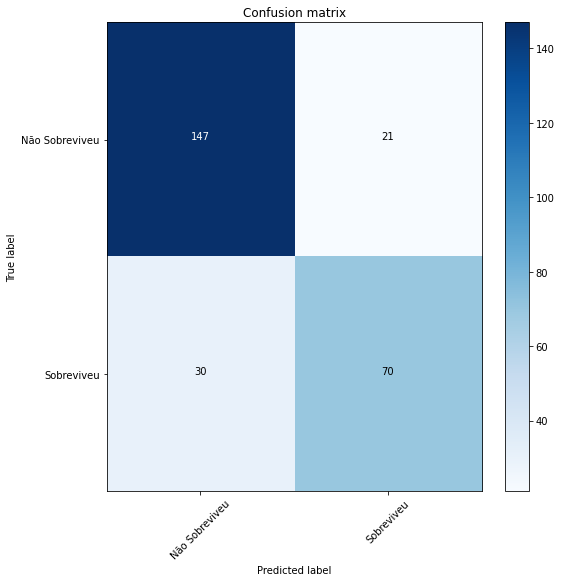

In [94]:
#http://scikit-learn.org/stable/modules/ensemble.html
#http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
#http://blog.yhathq.com/posts/random-forests-in-python.html
#http://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=300, 
                                criterion='gini', 
                                max_depth=None, 
                                min_samples_split=3, #2,
                                min_samples_leaf=1, 
                                min_weight_fraction_leaf=0.0, 
                                max_features='auto', 
                                max_leaf_nodes=None, 
                                bootstrap=True, 
                                oob_score=False, 
                                n_jobs=-1, 
                                random_state=0, 
                                verbose=0, 
                                warm_start=False, 
                                class_weight=None).fit(X_traincv_cat, y_traincv_cat)



roc_rf = clf_eval(clf_rf, X_testcv_cat, y_testcv_cat)

##### Assessing the importance of the features

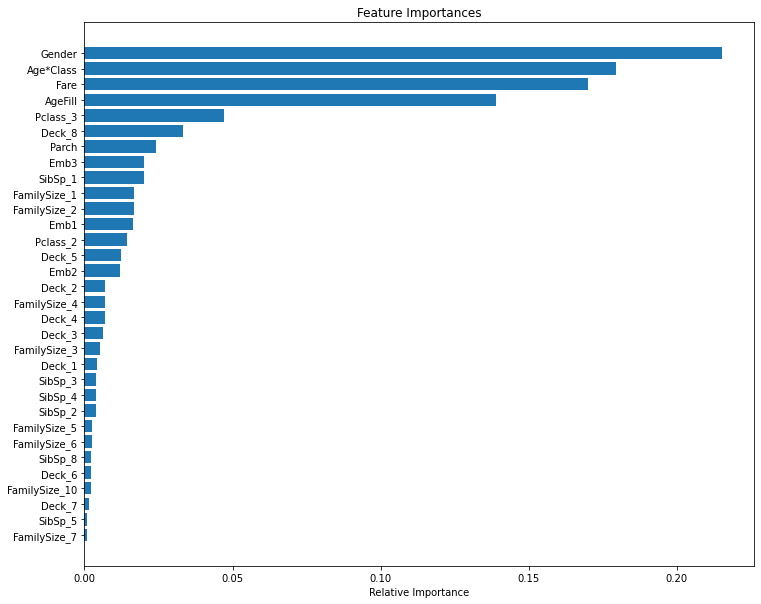

In [95]:
features = df_train_cat.columns
importances = clf_rf.feature_importances_
indices = np.argsort(importances) #[0:9])  # top 10 features
plt.figure(figsize=(12,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

##### Plotting the confidence intervals  
https://github.com/scikit-learn-contrib/forest-confidence-interval  

Failed to import duecredit due to No module named 'duecredit'
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


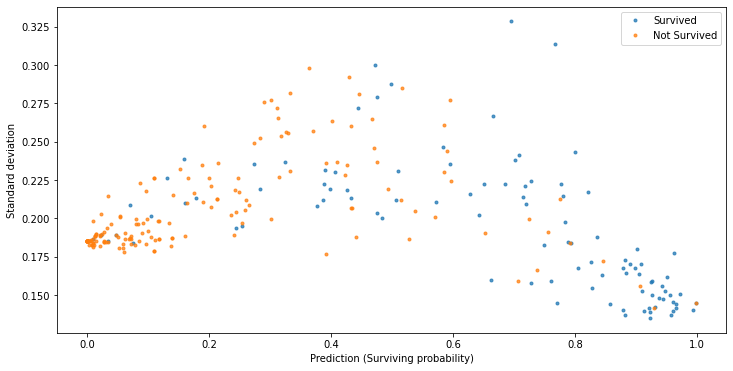

In [96]:
import forestci as fci

y_predicted = clf_rf.predict_proba(X_testcv_cat)

# calculate inbag and unbiased variance
inbag = fci.calc_inbag(X_traincv_cat.shape[0], clf_rf)
unbiased = fci.random_forest_error(clf_rf, X_traincv_cat, X_testcv_cat, inbag)

# Plot forest prediction for survivors and standard deviation for estimates
# Blue points are survivors; Green points are non-survivors
idx = np.where(y_testcv_cat == 1)[0]

plt.figure(figsize=(12,6))
plt.errorbar(y_predicted[idx, 1], 
             np.sqrt(unbiased[idx]),
             fmt='.', 
             alpha=0.75, 
             label='Survived')

idx = np.where(y_testcv_cat == 0)[0]
plt.errorbar(y_predicted[idx, 1],
             np.sqrt(unbiased[idx]),
             fmt='.', 
             alpha=0.75, 
             label='Not Survived')

plt.xlabel('Prediction (Surviving probability)')
plt.ylabel('Standard deviation')
plt.legend()
plt.show()

Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.83      0.85      0.84       168
    Sobreviveu       0.74      0.70      0.72       100

      accuracy                           0.79       268
     macro avg       0.78      0.78      0.78       268
  weighted avg       0.79      0.79      0.79       268

ROC Score: 0.7755952380952381
Accuracy Score: 0.7947761194029851
Average Precision Score: 0.6277297721916731
f1 Score: 0.717948717948718
Confusion matrix, without normalization
[[143  25]
 [ 30  70]]


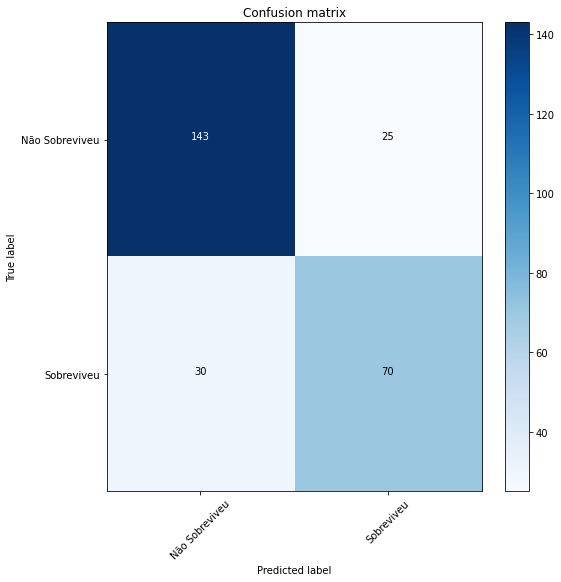

In [97]:
from sklearn.ensemble import BaggingClassifier

clf_bgc = BaggingClassifier().fit(X_traincv_cat, y_traincv_cat)

roc_bgc = clf_eval(clf_bgc, X_testcv_cat, y_testcv_cat)

Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.82      0.84      0.83       168
    Sobreviveu       0.72      0.70      0.71       100

      accuracy                           0.79       268
     macro avg       0.77      0.77      0.77       268
  weighted avg       0.79      0.79      0.79       268

ROC Score: 0.7696428571428572
Accuracy Score: 0.7873134328358209
Average Precision Score: 0.6170949376827204
f1 Score: 0.7106598984771574
Confusion matrix, without normalization
[[141  27]
 [ 30  70]]


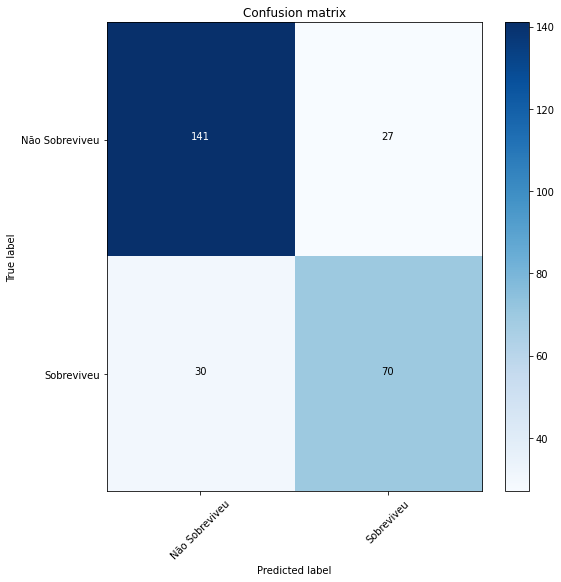

In [98]:
#http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html
from sklearn.ensemble import ExtraTreesClassifier

clf_etc = ExtraTreesClassifier(n_estimators=300,
                               max_depth=None,
                               min_samples_split=3,
                               random_state=0).fit(X_traincv_cat, y_traincv_cat)

roc_etc = clf_eval(clf_etc, X_testcv_cat, y_testcv_cat)

#### Boosting

Boosting is a machine learning ensemble meta-algorithm for primarily reducing bias, and also variance in supervised learning, and a family of machine learning algorithms that convert weak learners to strong ones. Boosting is based on the question posed by Kearns and Valiant (1988, 1989): Can a set of weak learners create a single strong learner? A weak learner is defined to be a classifier that is only slightly correlated with the true classification (it can label examples better than random guessing). In contrast, a strong learner is a classifier that is arbitrarily well-correlated with the true classification.

Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.86      0.87      0.86       168
    Sobreviveu       0.78      0.76      0.77       100

      accuracy                           0.83       268
     macro avg       0.82      0.81      0.82       268
  weighted avg       0.83      0.83      0.83       268

ROC Score: 0.8145238095238095
Accuracy Score: 0.8283582089552238
Average Precision Score: 0.678939993908011
f1 Score: 0.7676767676767676
Confusion matrix, without normalization
[[146  22]
 [ 24  76]]


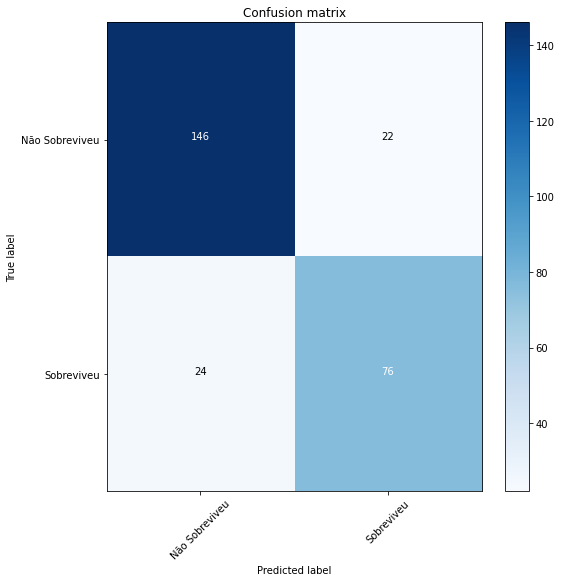

In [99]:
#http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
from sklearn.ensemble import AdaBoostClassifier

clf_abc = AdaBoostClassifier(base_estimator=None,
                             n_estimators=300,
                             learning_rate=0.1,
                             algorithm='SAMME.R',
                             random_state=0).fit(X_traincv_cat, y_traincv_cat)

roc_abc = clf_eval(clf_abc, X_testcv_cat, y_testcv_cat)

Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.86      0.88      0.87       168
    Sobreviveu       0.79      0.75      0.77       100

      accuracy                           0.83       268
     macro avg       0.82      0.82      0.82       268
  weighted avg       0.83      0.83      0.83       268

ROC Score: 0.8154761904761904
Accuracy Score: 0.832089552238806
Average Precision Score: 0.6853888452474469
f1 Score: 0.7692307692307692
Confusion matrix, without normalization
[[148  20]
 [ 25  75]]


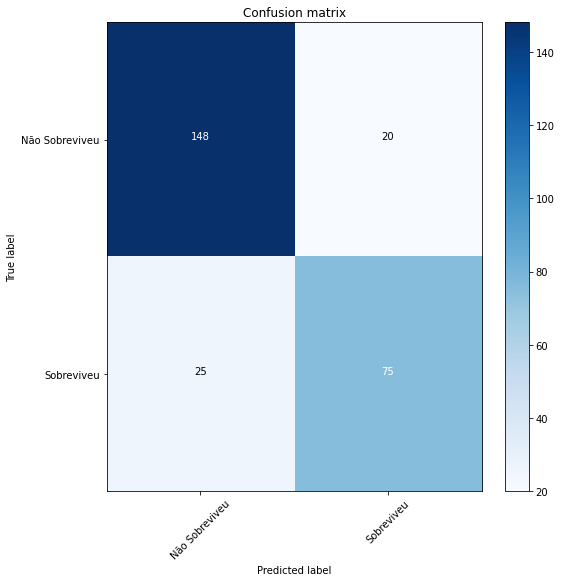

In [100]:
#http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
from sklearn.ensemble import GradientBoostingClassifier

clf_gbc = GradientBoostingClassifier(loss='deviance',
                                     learning_rate=0.1,
                                     n_estimators=200,
                                     subsample=1.0, 
                                     min_samples_split=3, 
                                     min_samples_leaf=1, 
                                     min_weight_fraction_leaf=0.0, 
                                     max_depth=3, 
                                     init=None, 
                                     random_state=0, 
                                     max_features=None, 
                                     verbose=0, 
                                     max_leaf_nodes=None, 
                                     warm_start=False,).fit(X_traincv_cat, y_traincv_cat)

roc_gbc = clf_eval(clf_gbc, X_testcv_cat, y_testcv_cat)

[15:51:36] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.81      0.95      0.87       168
    Sobreviveu       0.88      0.63      0.73       100

      accuracy                           0.83       268
     macro avg       0.84      0.79      0.80       268
  weighted avg       0.84      0.83      0.82       268

ROC Score: 0.7882142857142856
Accuracy Score: 0.8283582089552238
Average Precision Score: 0.6893097014925373
f1 Score: 0.7325581395348838
Confusion matrix, without normalization
[[159   9]
 [ 37  63]]


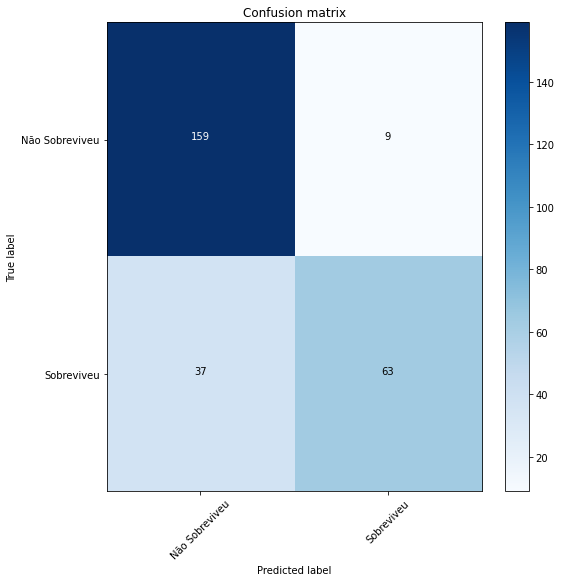

In [101]:
#https://github.com/dmlc/xgboost/tree/master/python-package  
#https://xgboost.readthedocs.io/en/latest/build.html#building-on-ubuntu-debian
#http://xgboost.readthedocs.io/en/latest/build.html#python-package-installation  
#http://xgboost.readthedocs.io/en/latest/parameter.html  
#https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/  
#https://www.kaggle.com/cbrogan/titanic/xgboost-example-python/run/1620  
#http://xgboost.readthedocs.io/en/latest//python/python_api.html#module-xgboost.sklearn

import xgboost

clf_xgb = xgboost.sklearn.XGBClassifier(base_score=0.5,
                                        learning_rate=0.1,
                                        n_estimators=250,
                                        max_delta_step=0,
                                        max_depth=2,
                                        min_child_weight=1,
                                        missing=None,
                                        gamma=0.1,
                                        subsample=1,
                                        colsample_bylevel=1,
                                        colsample_bytree=1,
                                        objective= 'binary:logitraw',
                                        #objective='multi:softprob',
                                        reg_alpha=0, 
                                        reg_lambda=1,
                                        nthread=-1,
                                        scale_pos_weight=1,
                                        seed=0,
                                        silent=False,
                                        random_state=0).fit(X_traincv_cat, y_traincv_cat)

roc_xgb = clf_eval(clf_xgb, X_testcv_cat, y_testcv_cat)

Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.85      0.87      0.86       168
    Sobreviveu       0.77      0.75      0.76       100

      accuracy                           0.82       268
     macro avg       0.81      0.81      0.81       268
  weighted avg       0.82      0.82      0.82       268

ROC Score: 0.8095238095238096
Accuracy Score: 0.8246268656716418
Average Precision Score: 0.6731804893060471
f1 Score: 0.7614213197969544
Confusion matrix, without normalization
[[146  22]
 [ 25  75]]


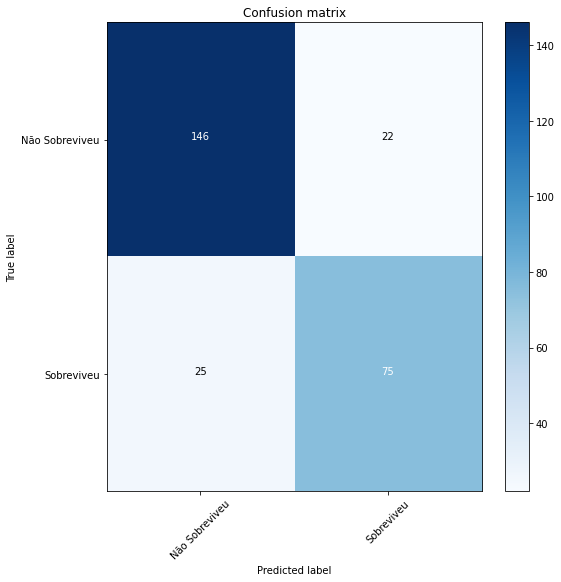

In [102]:
import lightgbm as lgb

params = {'boosting_type': 'gbdt',
          'max_depth' : -1,
          'objective': 'binary',
          'num_leaves': 64, 
          'learning_rate': 0.05, 
          'max_bin': 512, 
          'subsample_for_bin': 200,
          'subsample': 1, 
          'subsample_freq': 1, 
          'colsample_bytree': 0.8, 
          'reg_alpha': 5, 
          'reg_lambda': 10,
          'min_split_gain': 0.15, 
          'min_child_weight': 1, 
          'min_child_samples': 5, 
          'scale_pos_weight': 1,
          'num_class' : 1,
          'metric' : 'binary_error'}

lgb_train = lgb.Dataset(X_traincv_cat, y_traincv_cat)
lgb_eval = lgb.Dataset(X_testcv_cat, y_testcv_cat, reference=lgb_train)

clf_lgb = lgb.LGBMClassifier(boosting_type= 'gbdt',
                             objective = 'binary',
                             n_jobs = -1,
                             silent = True,
                             max_depth = params['max_depth'],
                             max_bin = params['max_bin'],
                             subsample_for_bin = params['subsample_for_bin'],
                             subsample = params['subsample'],
                             subsample_freq = params['subsample_freq'],
                             min_split_gain = params['min_split_gain'], 
                             min_child_weight = params['min_child_weight'], 
                             min_child_samples = params['min_child_samples'], 
                             scale_pos_weight = params['scale_pos_weight'])

clf_lgb.fit(X_traincv_cat, y_traincv_cat)


roc_lgb = clf_eval(clf_lgb, X_testcv_cat, y_testcv_cat)

#### Regularized Greedy Forest

In Boosting algorithms, each classifier/regressor is trained on data, taking into account the previous classifiers’/regressors’ success. After each training step, the weights are redistributed. Mis-classified data increases its weights to emphasize the most difficult cases. In this way, subsequent learners will focus on them during their training. However, the boosting methods simply treat the decision tree base learner as a black box and it does not take advantage of the tree structure itself.  In a sense, boosting does a partial corrective step to the model at each iteration. In contrast, RGF performs 2 steps:

+ Finds the one step structural change to the current forest to obtain the new forest that minimises the loss function (e.g. Least squares or logloss)
+ Adjusts the leaf weights for the entire forest to minimize the loss function

Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.85      0.92      0.88       168
    Sobreviveu       0.85      0.72      0.78       100

      accuracy                           0.85       268
     macro avg       0.85      0.82      0.83       268
  weighted avg       0.85      0.85      0.84       268

ROC Score: 0.8213095238095238
Accuracy Score: 0.8470149253731343
Average Precision Score: 0.7143599648814749
f1 Score: 0.7783783783783784
Confusion matrix, without normalization
[[155  13]
 [ 28  72]]


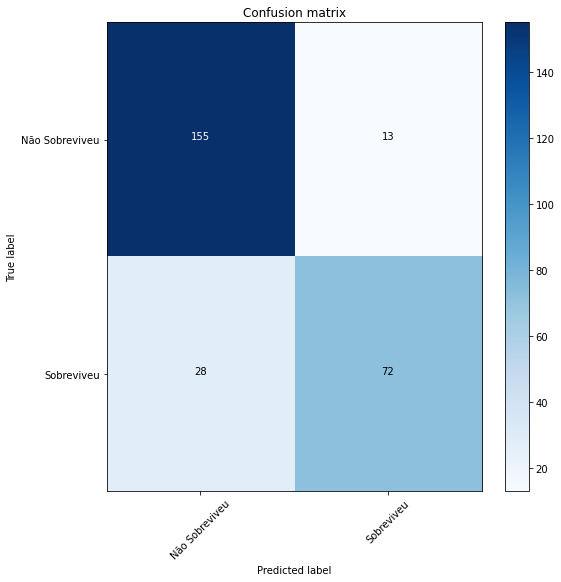

In [103]:
# https://www.analyticsvidhya.com/blog/2018/02/introductory-guide-regularized-greedy-forests-rgf-python/
# https://github.com/fukatani/rgf_python
#https://github.com/MLWave/RGF-sklearn -- another implementation
##https://github.com/RGF-team/rgf_python -- another implementation

from rgf.sklearn import RGFClassifier, FastRGFClassifier

clf_rgf = RGFClassifier(max_leaf=240,
                        algorithm="RGF_Sib",
                        test_interval=100,
                        verbose=False,).fit(X_traincv_cat, y_traincv_cat)

roc_rgf = clf_eval(clf_rgf, X_testcv_cat, y_testcv_cat)

#### Bayesian Classifiers

Naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features/predictors) in a learning problem. Maximum-likelihood training can be done by evaluating a closed-form expression, which takes linear time, rather than by expensive iterative approximation as used for many other types of classifiers.

Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.84      0.77      0.80       168
    Sobreviveu       0.66      0.75      0.70       100

      accuracy                           0.76       268
     macro avg       0.75      0.76      0.75       268
  weighted avg       0.77      0.76      0.76       268

ROC Score: 0.7589285714285714
Accuracy Score: 0.7611940298507462
Average Precision Score: 0.5867046347211312
f1 Score: 0.7009345794392524
Confusion matrix, without normalization
[[129  39]
 [ 25  75]]


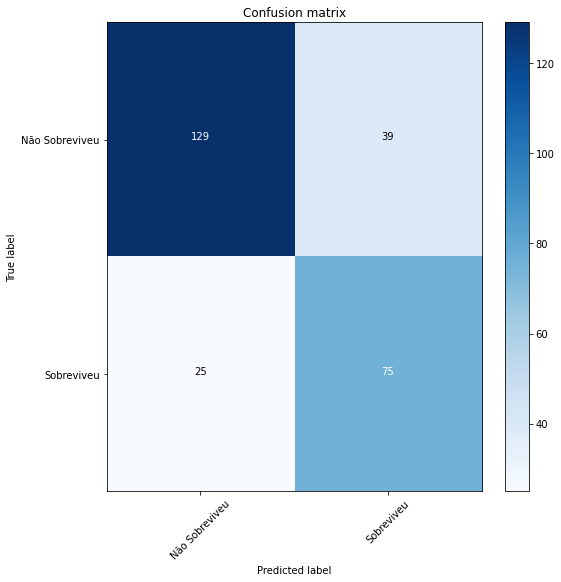

In [104]:
#http://scikit-learn.org/stable/modules/naive_bayes.html
#http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
from sklearn.naive_bayes import GaussianNB

clf_gnb = GaussianNB().fit(X_traincv_num, y_traincv_num)

roc_gnb = clf_eval(clf_gnb, X_testcv_num, y_testcv_num)

Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.81      0.82      0.81       168
    Sobreviveu       0.68      0.67      0.68       100

      accuracy                           0.76       268
     macro avg       0.74      0.74      0.74       268
  weighted avg       0.76      0.76      0.76       268

ROC Score: 0.7427380952380952
Accuracy Score: 0.7611940298507462
Average Precision Score: 0.5811955528480048
f1 Score: 0.6767676767676768
Confusion matrix, without normalization
[[137  31]
 [ 33  67]]


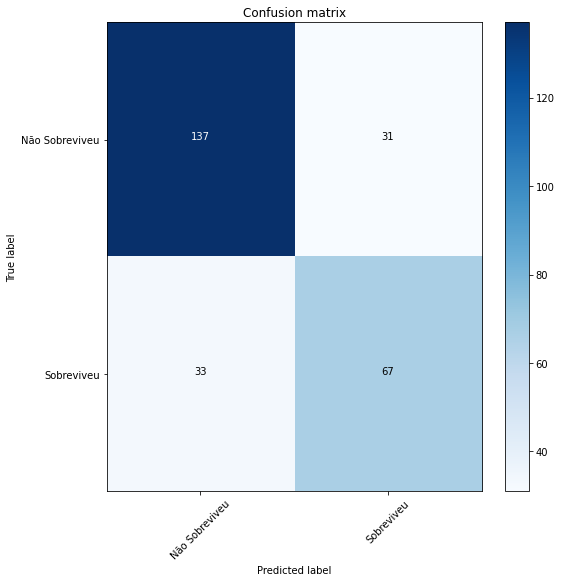

In [105]:
#http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html
from sklearn.naive_bayes import BernoulliNB

clf_bnb = BernoulliNB(alpha=0.20, 
                     binarize=0.0, 
                     fit_prior=True, 
                     class_prior=None).fit(X_traincv_cat, y_traincv_cat)

roc_bnb = clf_eval(clf_bnb, X_testcv_cat, y_testcv_cat)

#### Gaussian Processes

In the simple linear regression setting, we have a dependent variable y that we assume can be modeled as a function of an independent variable x, i.e. y=f(x)+ϵ (where ϵ is the irreducible error) but we assume further that the function f defines a linear relationship and so we are trying to find the parameters θ0  and θ1 which define the intercept and slope of the line respectively, i.e. y=θ0+θ1x+ϵ. Bayesian linear regression provides a probabilistic approach to this by finding a distribution over the parameters that gets updated whenever new data points are observed. The GP approach, in contrast, is a non-parametric approach, in that it finds a distribution over the possible functions f(x) that are consistent with the observed data. As with all Bayesian methods it begins with a prior distribution and updates this as data points are observed, producing the posterior distribution over functions.

Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.81      0.88      0.85       168
    Sobreviveu       0.77      0.66      0.71       100

      accuracy                           0.80       268
     macro avg       0.79      0.77      0.78       268
  weighted avg       0.80      0.80      0.79       268

ROC Score: 0.7704761904761905
Accuracy Score: 0.7985074626865671
Average Precision Score: 0.6333772995487679
f1 Score: 0.7096774193548386
Confusion matrix, without normalization
[[148  20]
 [ 34  66]]


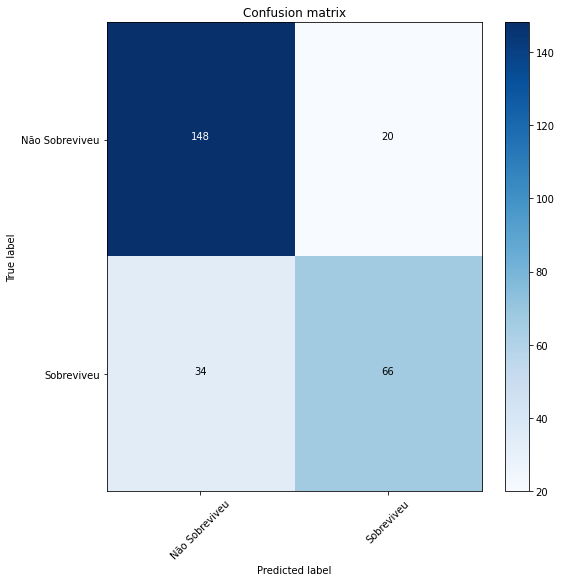

In [106]:
from sklearn.gaussian_process import GaussianProcessClassifier


clf_gpc = GaussianProcessClassifier(kernel=None, 
                                    optimizer='fmin_l_bfgs_b', 
                                    n_restarts_optimizer=0, 
                                    max_iter_predict=100, 
                                    warm_start=False, 
                                    copy_X_train=True, 
                                    random_state=0, 
                                    multi_class='one_vs_rest', 
                                    n_jobs=-1).fit(X_traincv_cat, y_traincv_cat)

roc_gpc = clf_eval(clf_gpc, X_testcv_cat, y_testcv_cat)

#### Neural Networks

Tensorflow and Keras

623 train samples
268 test samples
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               3300      
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                4824      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 28,349
Trainable params: 28,349
Non-trainable params: 0
_________________________________________________________________
Test loss: 0.4839400053024292
Test accuracy: 0.7985074520111084
Instructions for up

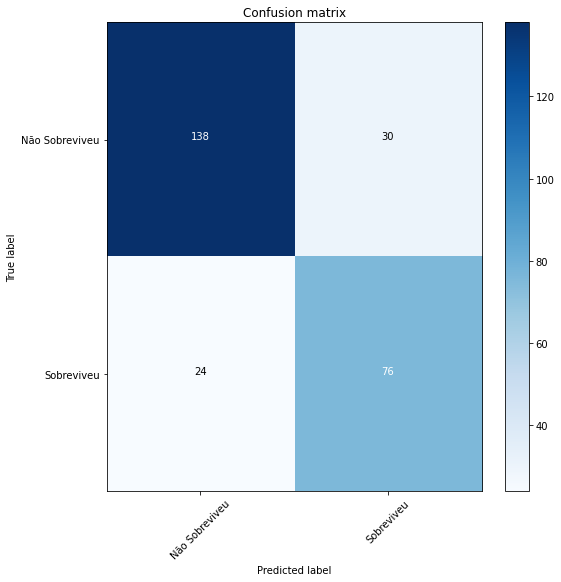

In [107]:
import tensorflow as tf

x_train_kr = X_traincv_cat.astype('float32') 
x_test_kr = X_testcv_cat.astype('float32')

print(x_train_kr.shape[0], 'train samples')
print(x_test_kr.shape[0], 'test samples')

y_train_kr = y_traincv_cat
y_test_kr = y_testcv_cat

# convert class vectors to binary class matrices for categorical cross_entropy
#y_train_kr = to_categorical(y_traincv)
#y_test_kr = to_categorical(y_testcv)

batch_size = int(len(x_test_kr)/10)
num_classes = 2
epochs = 10
np.random.seed(0)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(input_dim=x_train_kr.shape[1], units=100, activation='relu'))
#model.add(tf.keras.layers.Dropout(0.10))
model.add(tf.keras.layers.Dense(input_dim=100, units=200, activation='relu'))
#model.add(tf.keras.layers.Dropout(0.10))
#model.add(tf.keras.layers.Dense(input_dim=200, units=200, activation='relu'))
model.add(tf.keras.layers.Dropout(0.10))
model.add(tf.keras.layers.Dense(input_dim=200, units=24, activation='relu'))
#model.add(tf.keras.layers.Dropout(0.10))
model.add(tf.keras.layers.Dense(input_dim=24,  units=1, activation='sigmoid')) #kernel_initializer='uniform',
model.summary()


model.compile(loss='binary_crossentropy',
              #loss='categorical_crossentropy',
              #loss='mean_squared_error',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001, 
                                                    rho=0.9, 
                                                    momentum=0.0, 
                                                    epsilon=1e-07, 
                                                    centered=False,
                                                    name='RMSprop'), 
              metrics=['binary_accuracy'])

history = model.fit(x_train_kr, y_train_kr,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0,
                    shuffle=False,
                    validation_data=(x_test_kr, y_test_kr))

score = model.evaluate(x_test_kr, y_test_kr, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


y_pred = model.predict_classes(x_test_kr) #y_pred = np.around(model.predict(x_test_kr)[:,1])
#y_test_kr = y_test_kr[:,1] #for categorical cross_entropy
clf_matrix = confusion_matrix(y_test_kr, y_pred)
print('Classification Report')
print(classification_report(y_test_kr, y_pred, target_names=['Não Sobreviveu', 'Sobreviveu']))
print('ROC Score: {}'.format(roc_auc_score(y_test_kr, y_pred)))
print('Accuracy Score: {}'.format(accuracy_score(y_test_kr, y_pred)))
print('Average Precision Score: {}'.format(average_precision_score(y_test_kr, y_pred)))
print('f1 Score: {}'.format(f1_score(y_test_kr, y_pred)))
plot_confusion_matrix(clf_matrix, classes=['Não Sobreviveu', 'Sobreviveu'])
roc_keras = roc_auc_score(y_test_kr, y_pred)

In [108]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


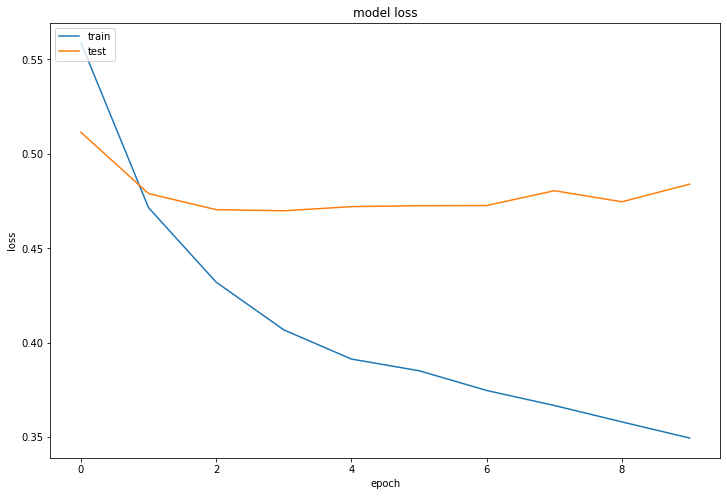

In [109]:
# summarize history for loss
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

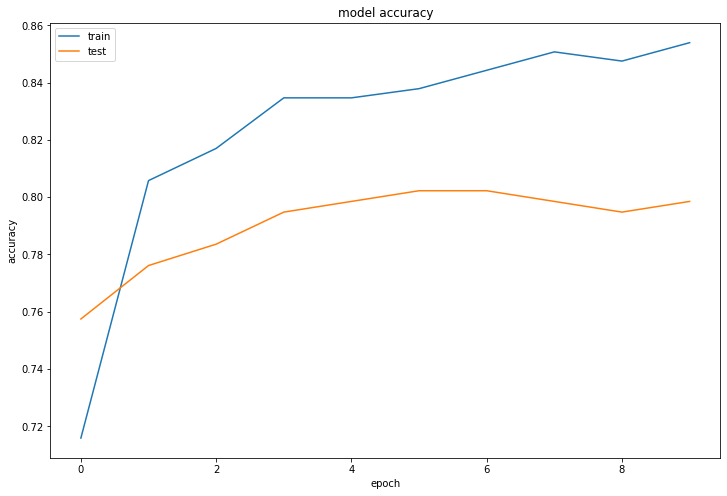

In [110]:
# summarize history for accuracy
plt.figure(figsize=(12,8))
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Genetic Algorithms


10.05 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.
Best pipeline: GradientBoostingClassifier(CombineDFs(input_matrix, input_matrix), learning_rate=0.1, max_depth=6, max_features=0.4, min_samples_leaf=15, min_samples_split=15, n_estimators=100, subsample=0.6000000000000001)
Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.86      0.89      0.87       168
    Sobreviveu       0.80      0.75      0.77       100

      accuracy                           0.84       268
     macro avg       0.83      0.82      0.82       268
  weighted avg       0.83      0.84      0.83       268

ROC Score: 0.8184523809523809
Accuracy Score: 0.835820895522388
Average Precision Score: 0.6916878374087011
f1 Score: 0.7731958762886597
Confusion matrix, without normalization
[[149  19]
 [ 25  75]]


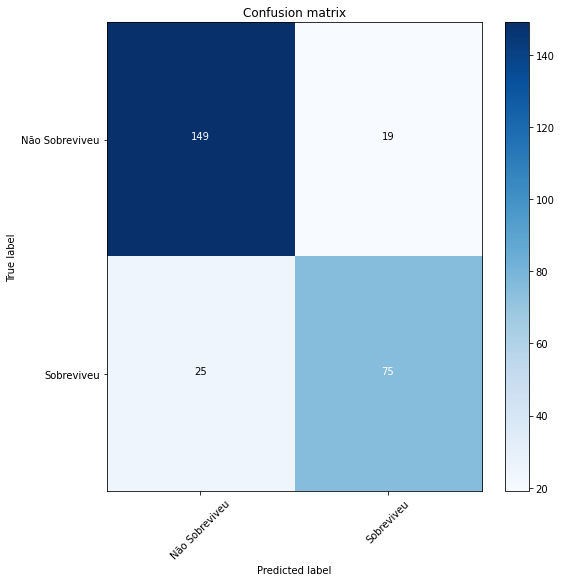

In [111]:
# https://github.com/rhiever/tpot
# https://github.com/rhiever/tpot/blob/master/tutorials/Titanic_Kaggle.ipynb

from tpot import TPOTClassifier

clf_tpot = TPOTClassifier(verbosity=1, 
                          max_time_mins=10, 
                          max_eval_time_mins=5, 
                          population_size=100,
                          generations=10,
                          n_jobs=-1)

clf_tpot.fit(X_traincv_cat, y_traincv_cat)
roc_tpot = clf_eval(clf_tpot, X_testcv_cat, y_testcv_cat)

#clf_tpot.export('tpot_exported_pipeline.py')

#### Voting / Stacking

Voting algorithms are simple strategies, where you aglomerate results of classifiers' decisions by for example taking the class which appears in most cases. 

Stacking/grading strategies are generalizations of this concept. Instead of simply saying "ok, I have a scheme v, which I will use to select the best answer among my k classifiers" you create another abstraction layer, where you actually learn to predict the correct label having k votes.  

[16:01:46] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.84      0.89      0.86       168
    Sobreviveu       0.80      0.71      0.75       100

      accuracy                           0.82       268
     macro avg       0.82      0.80      0.81       268
  weighted avg       0.82      0.82      0.82       268

ROC Score: 0.8014285714285715
Accuracy Score: 0.8246268656716418
Average Precision Score: 0.6746134496059031
f1 Score: 0.7513227513227513
Confusion matrix, without normalization
[[150  18]
 [ 29  71]]


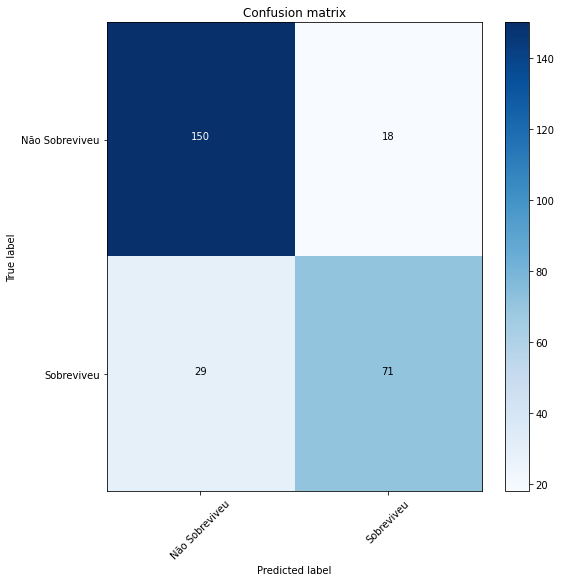

In [112]:
from sklearn.ensemble import VotingClassifier 
#http://scikit-learn.org/stable/modules/ensemble.html#votingclassifier

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    ensemble = VotingClassifier(estimators=[('clf_sgdc', clf_sgdc),
                                            ('clf_lgr', clf_lr),
                                            ('clf_rdg', clf_rgf),
                                            ('clf_bgc', clf_bgc),
                                            ('clf_etc', clf_etc),
                                            ('clf_abc', clf_abc),
                                            ('clf_pct', clf_pcp),
                                            ('clf_xgb', clf_xgb),
                                            ('clf_rf', clf_rf),
                                            ('clf_knn', clf_knn),
                                            ('clf_rgf', clf_rgf),
                                            #('clf_autoskl', clf_autoskl),
                                            #('clf_tpot', clf_tpot),
                                            ],
                                voting='hard',
                                weights=[1,1,1,1,1,1,1,1,1,1,1]).fit(X_traincv_cat, y_traincv_cat)

roc_ens = clf_eval(ensemble, X_testcv_cat, y_testcv_cat)

### Plotting the results:  

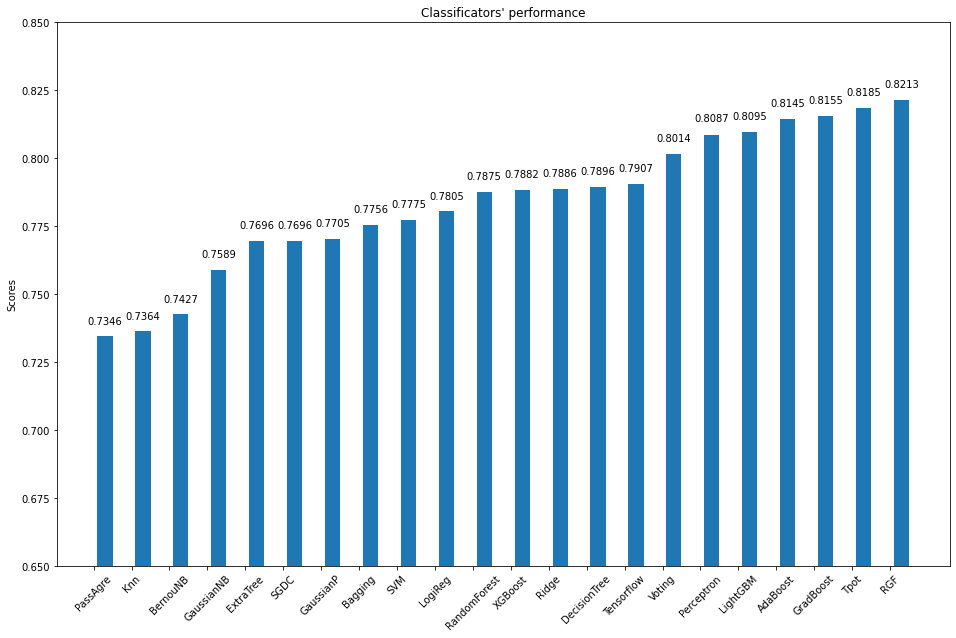

In [113]:
dic_results = {'SVM': roc_svc2,
               'RandomForest': roc_rf,
               'DecisionTree': roc_dtc,
               'ExtraTree': roc_etc,
               'AdaBoost': roc_abc,
               'GradBoost': roc_gbc,
               'LightGBM': roc_lgb,
               'SGDC': roc_sgdc,
               'Ridge': roc_rdg,
               'Perceptron': roc_pcp,
               'PassAgre': roc_pac,
               'LogiReg': roc_lr,
               'GaussianNB': roc_gnb,
               'BernouNB': roc_bnb,
               'RGF': roc_rgf,
               'XGBoost':roc_xgb,
               'Knn':roc_knn,
               'Tensorflow': roc_keras,
               'Bagging': roc_bgc,
               'Voting': roc_ens,
               'Tpot': roc_tpot,
               'RGF': roc_rgf,
               #'AutoSKL': roc_autoskl,
               'GaussianP': roc_gpc,
              }

import operator
tup_results = sorted(dic_results.items(), key=operator.itemgetter(1))

N = len(dic_results)
ind = np.arange(N)  # the x locations for the groups
width = 0.40       # the width of the bars

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
rects = ax.bar(ind+0.5, list(zip(*tup_results))[1], width,)
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x()+rect.get_width()/2., 
            1.005*height, 
            '{0:.4f}'.format(height), 
            ha='center', 
            va='bottom',)

ax.set_ylabel('Scores')
ax.set_ylim(ymin=0.65,ymax = 0.85)
ax.set_title("Classificators' performance")
ax.set_xticks(ind + width/2.)
ax.set_xticklabels(list(zip(*tup_results))[0], rotation=45)

plt.show()

In [114]:
features = df_train_cat.columns
df_fi = pd.DataFrame({'clf_lr': (abs(clf_lr.coef_[0])/sum(abs(clf_lr.coef_[0]))),    #a sort of adaptation
                      'clf_rf':clf_rf.feature_importances_,
                      'clf_xgb':clf_xgb.feature_importances_,
                      'clf_etc':clf_etc.feature_importances_,
                      'clf_abc':clf_abc.feature_importances_,
                      'clf_bgc':clf_bgc.estimators_[0].feature_importances_,
                      'clf_gbc':clf_gbc.feature_importances_,
                      'clf_lgb':clf_lgb.feature_importances_ / sum(clf_lgb.feature_importances_),
                     },
                      index=features)
df_fi['mean_importance'] = df_fi.mean(axis=1)
df_fi.sort_values(['mean_importance'], ascending=False, inplace=True)
df_fi

,clf_lr,clf_rf,clf_xgb,clf_etc,clf_abc,clf_bgc,clf_gbc,clf_lgb,mean_importance
Gender,0.238059,0.215339,0.288591,0.284060,0.126667,0.382800,0.397403,0.034746,0.245958
Fare,0.016046,0.170016,0.016593,0.132466,0.163333,0.169948,0.129562,0.364837,0.145350
Age*Class,0.062400,0.179611,0.037074,0.128108,0.223333,0.152915,0.167531,0.202919,0.144236
AgeFill,0.010713,0.138905,0.017258,0.114140,0.203333,0.102185,0.080332,0.229326,0.112024
Pclass_3,0.061525,0.047092,0.203339,0.057367,0.020000,0.053494,0.076419,0.020153,0.067424
Deck_8,0.054683,0.033245,0.134184,0.041762,0.010000,0.001149,0.012077,0.009034,0.037017
Emb3,0.033809,0.020262,0.039192,0.020521,0.026667,0.012570,0.022100,0.011814,0.023367
Deck_5,0.050684,0.012367,0.037478,0.016980,0.033333,0.000000,0.019452,0.012509,0.022850
SibSp_1,0.040897,0.020090,0.040789,0.022068,0.000000,0.035992,0.007172,0.009729,0.022092
FamilySize_2,0.052463,0.016581,0.036461,0.020425,0.000000,0.006619,0.027452,0.009729,0.021216


Choosing the best classifier and training with all training data:

In [115]:
output = clf_rgf.predict(X_test_cat)
print(output[10:20])
print()

output_prob = clf_rgf.predict_proba(X_test_cat)
print(output_prob[10:20])

[0 0 1 0 1 1 0 0 0 0]

[[0.85687054 0.14312946]
 [0.71630968 0.28369032]
 [0.06041358 0.93958642]
 [0.90409603 0.09590397]
 [0.05435891 0.94564109]
 [0.07521469 0.92478531]
 [0.81025018 0.18974982]
 [0.83762109 0.16237891]
 [0.64982137 0.35017863]
 [0.79952414 0.20047586]]


#### Examining the ROC Curve

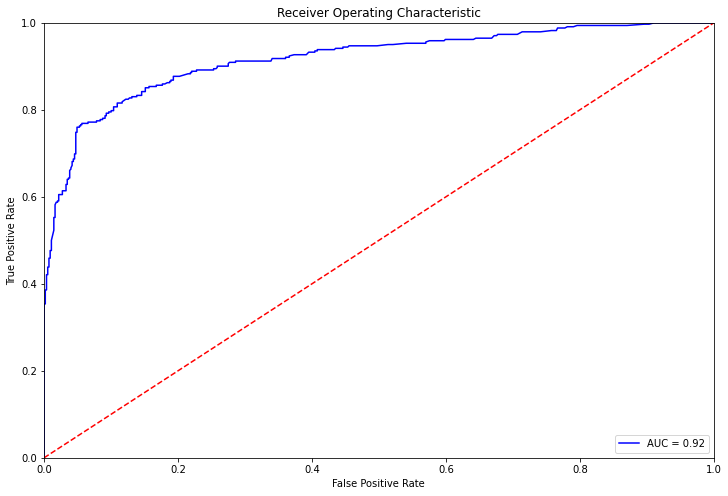

In [116]:
# calculate the fpr and tpr for all thresholds of the classification
probs = clf_rgf.predict_proba(X_train_cat)
y_hat = probs[:,1]
fpr, tpr, threshold = roc_curve(y_train, y_hat)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()